# Support Vector Machines 
## Instruction
## Ronan Jasper G. Reponte :s
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

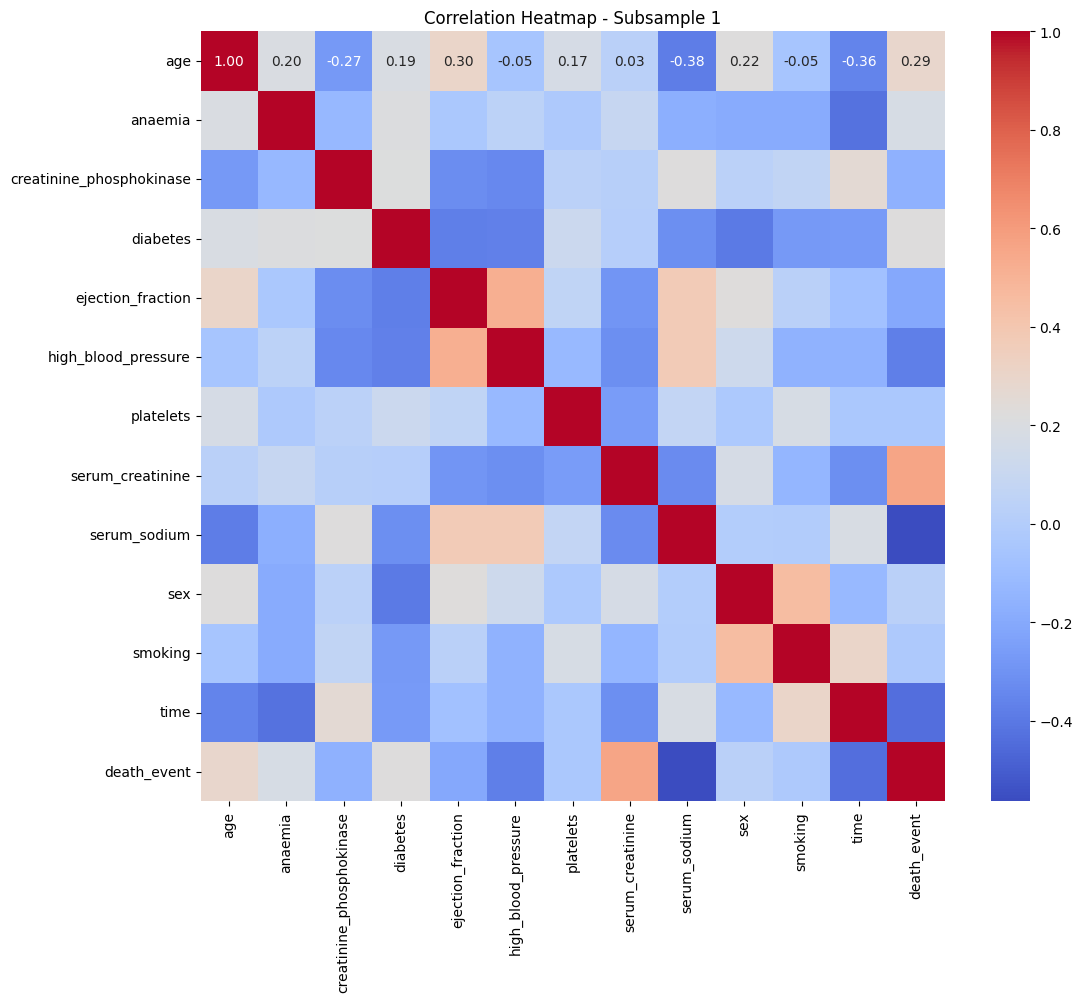

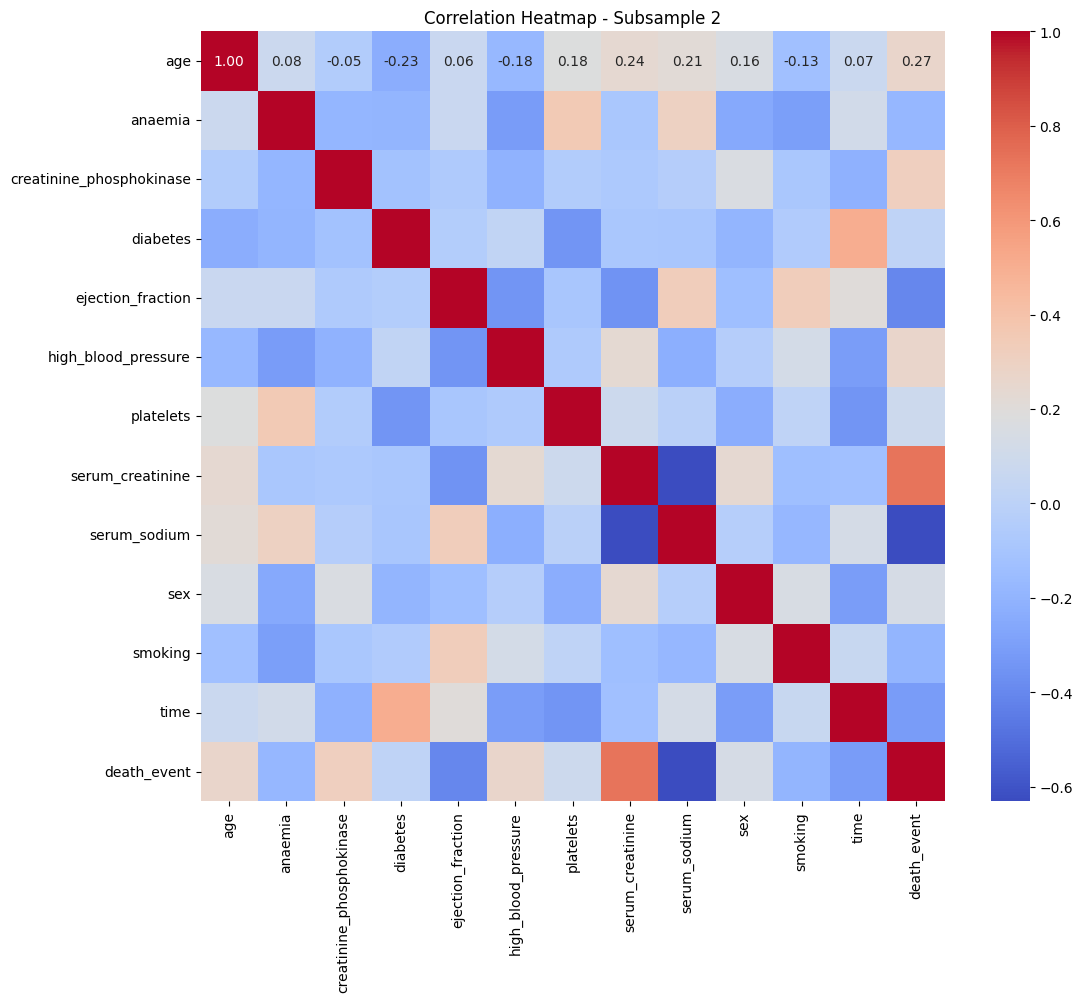

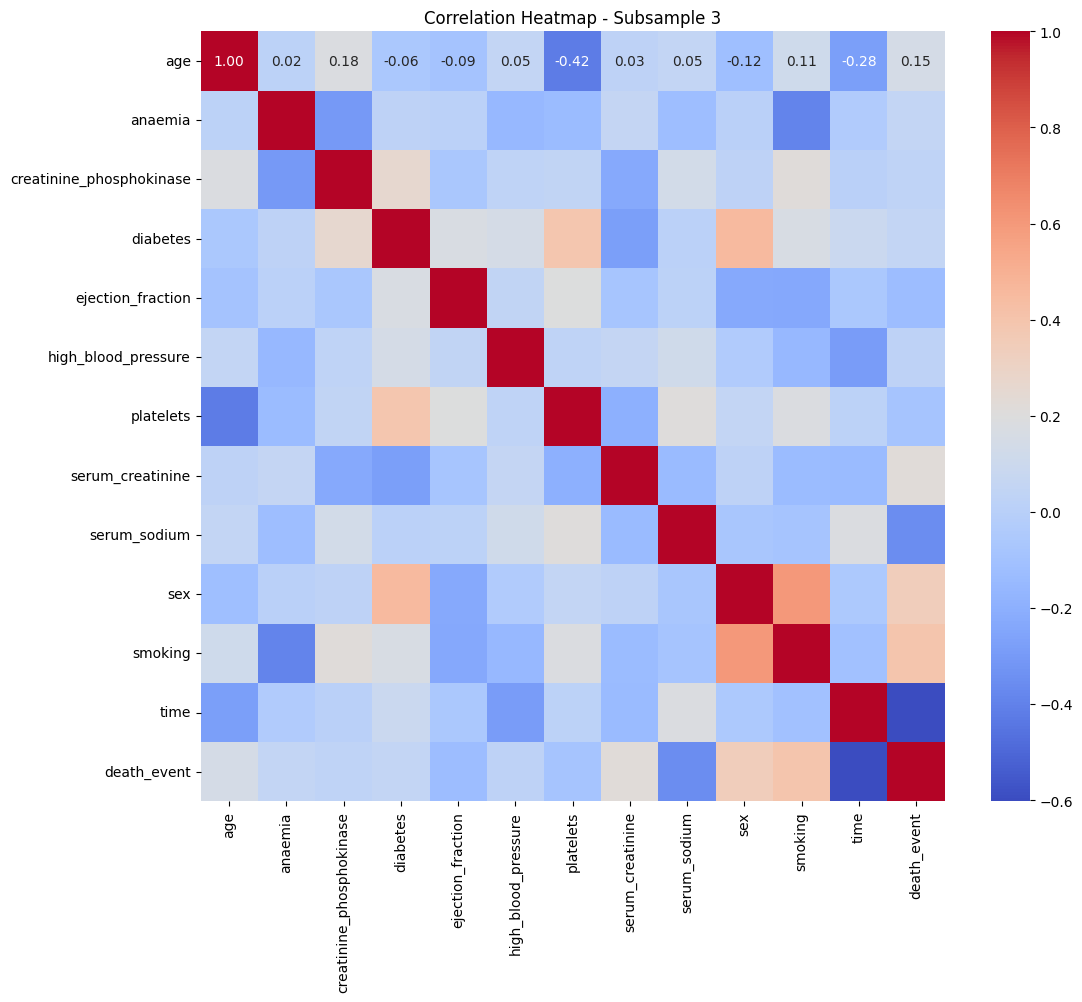

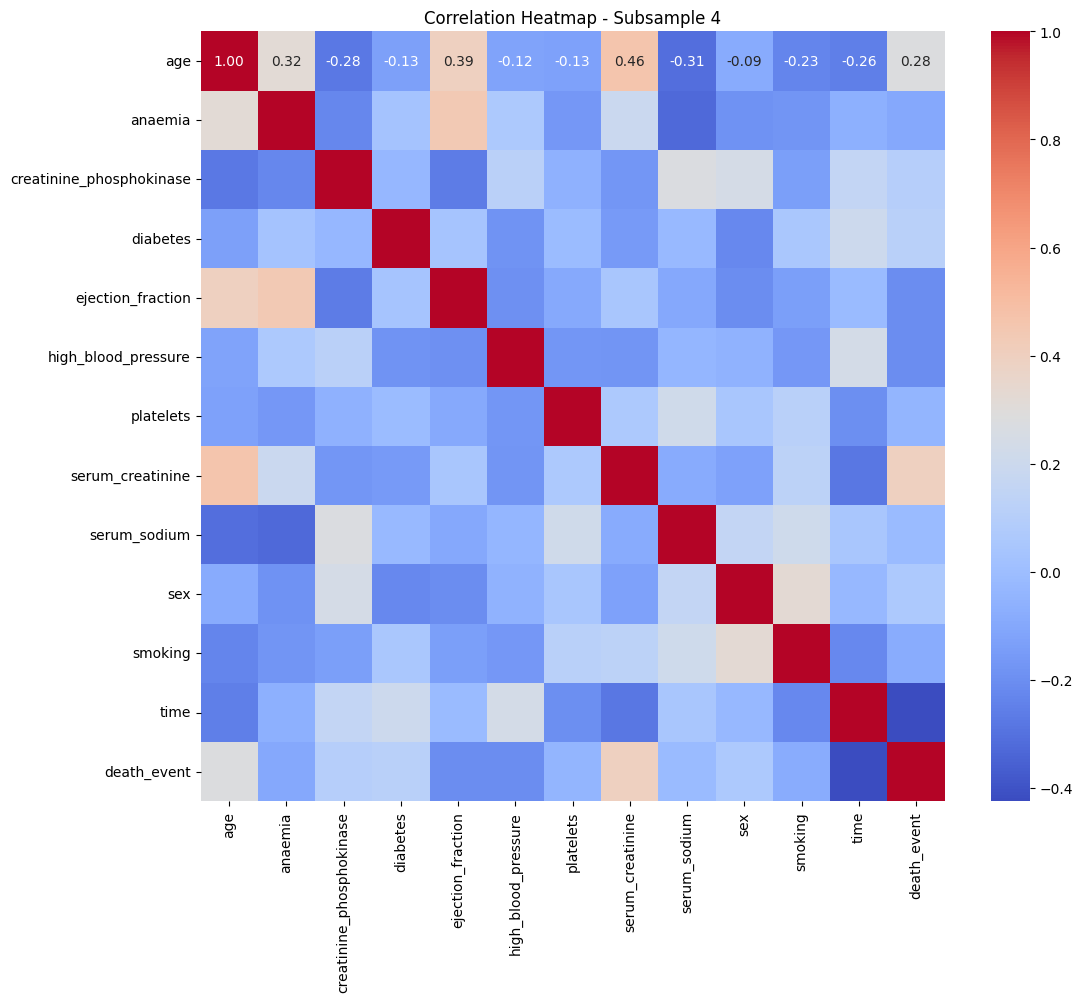

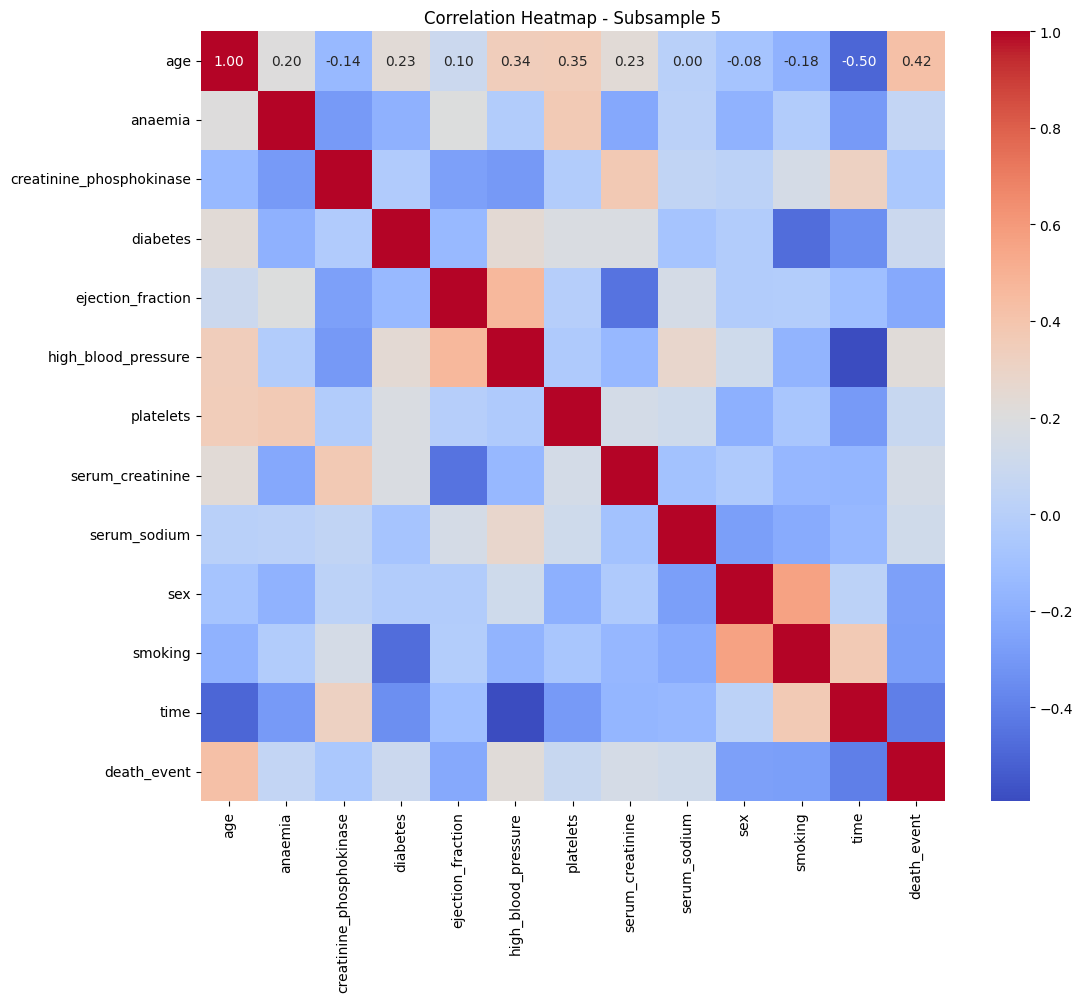

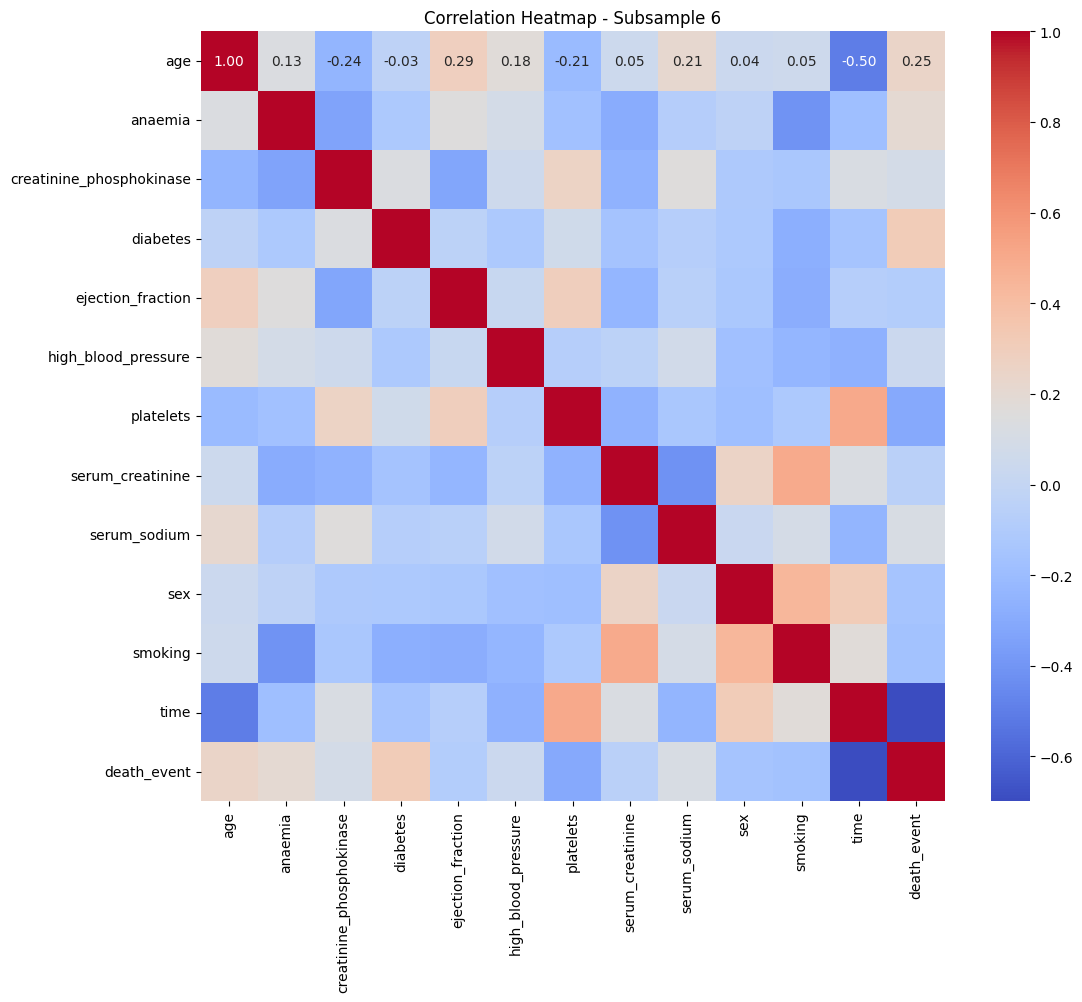

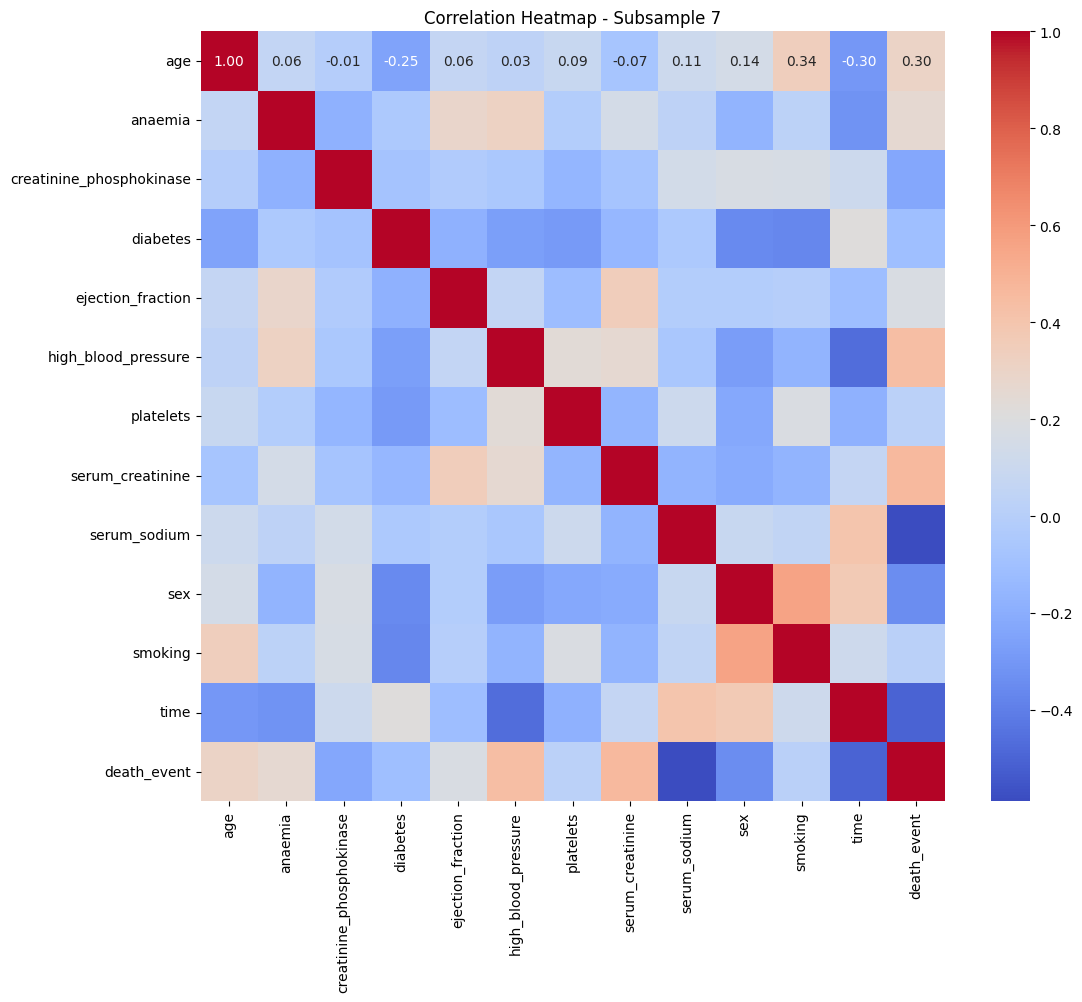

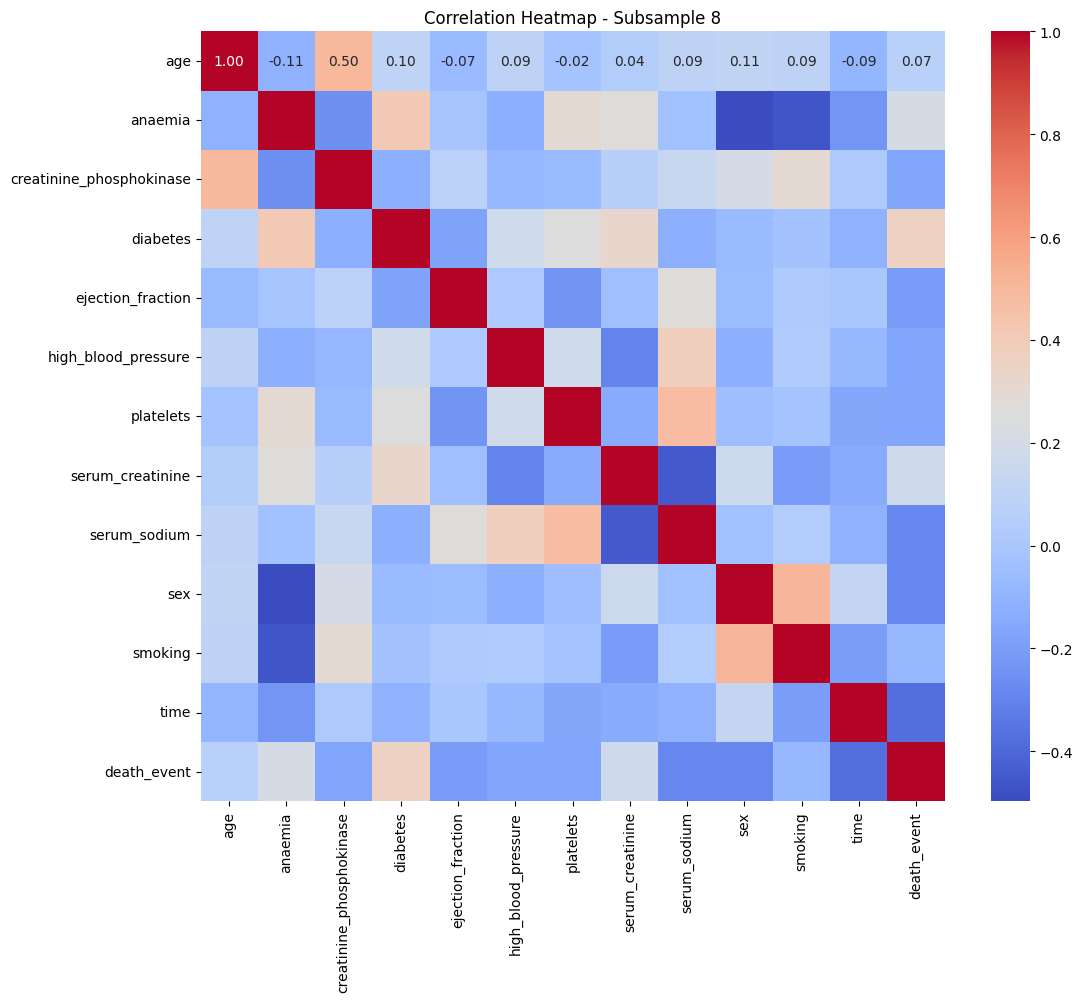

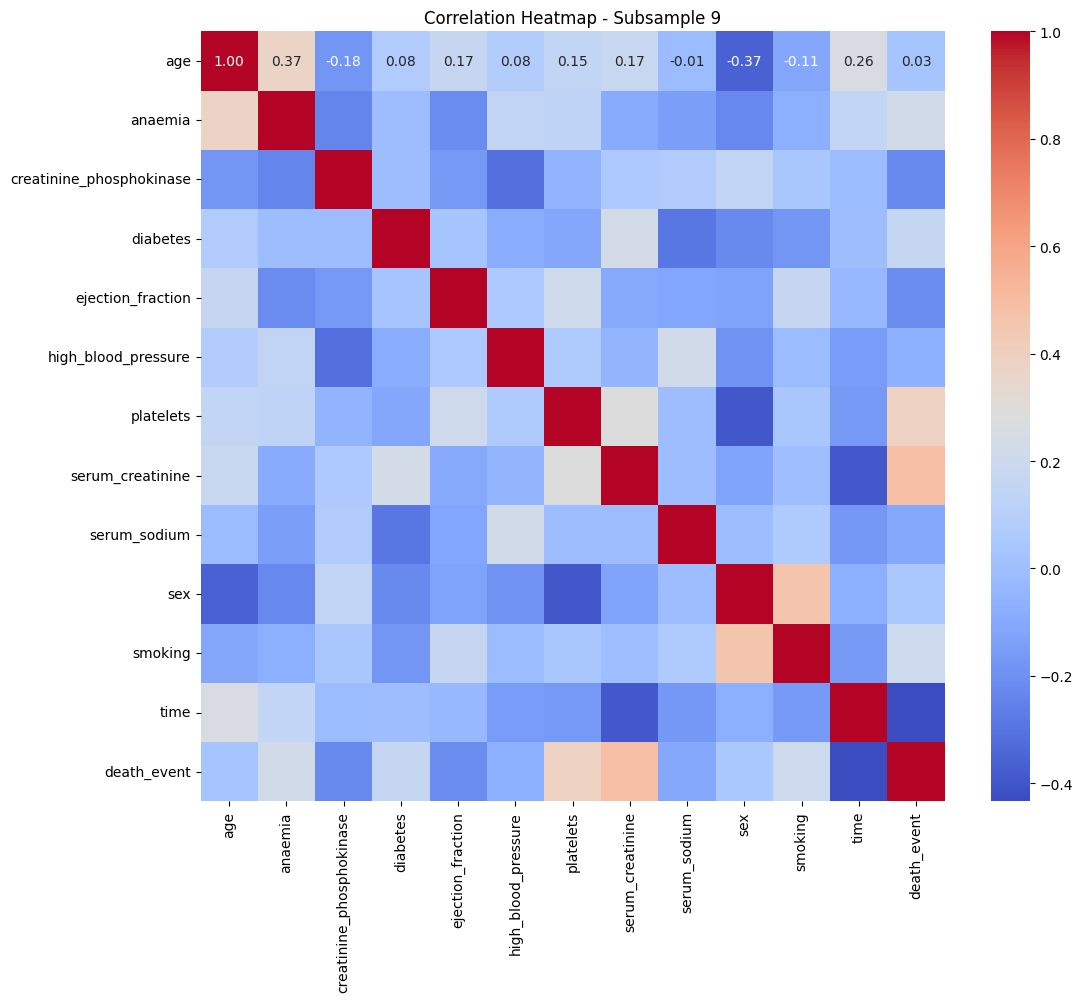

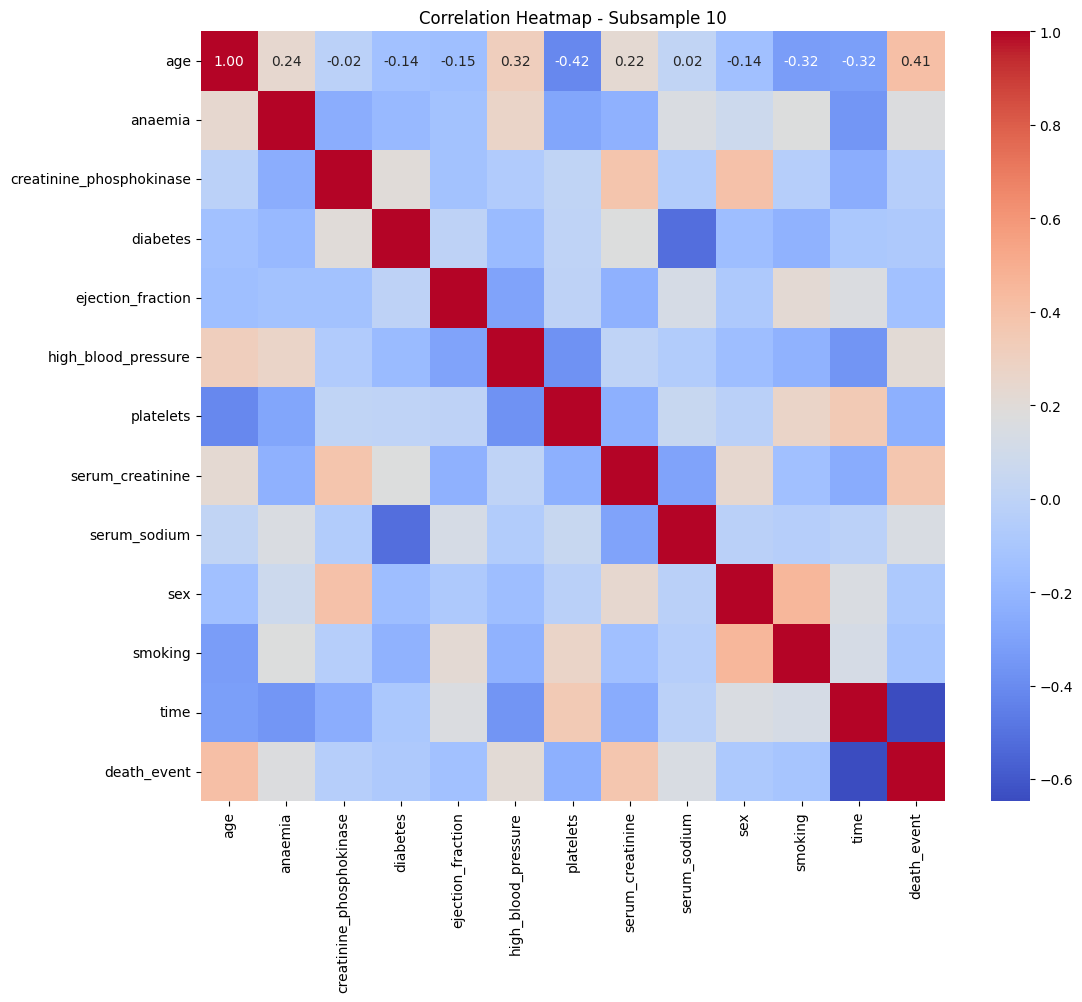

In [5]:
# Drop rows with non-numeric values
df_numeric = df.dropna().select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(df_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(df_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = df_numeric.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced***

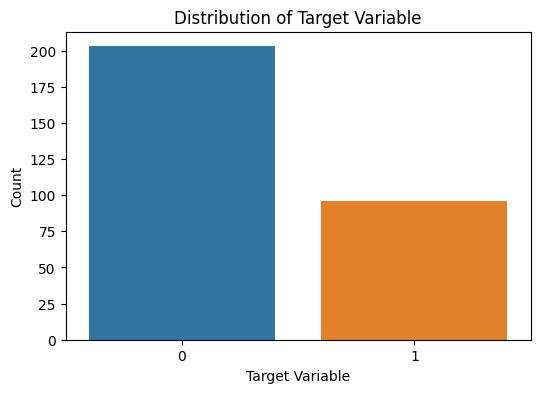

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df)  # Replace 'target_variable' with your actual target variable name
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

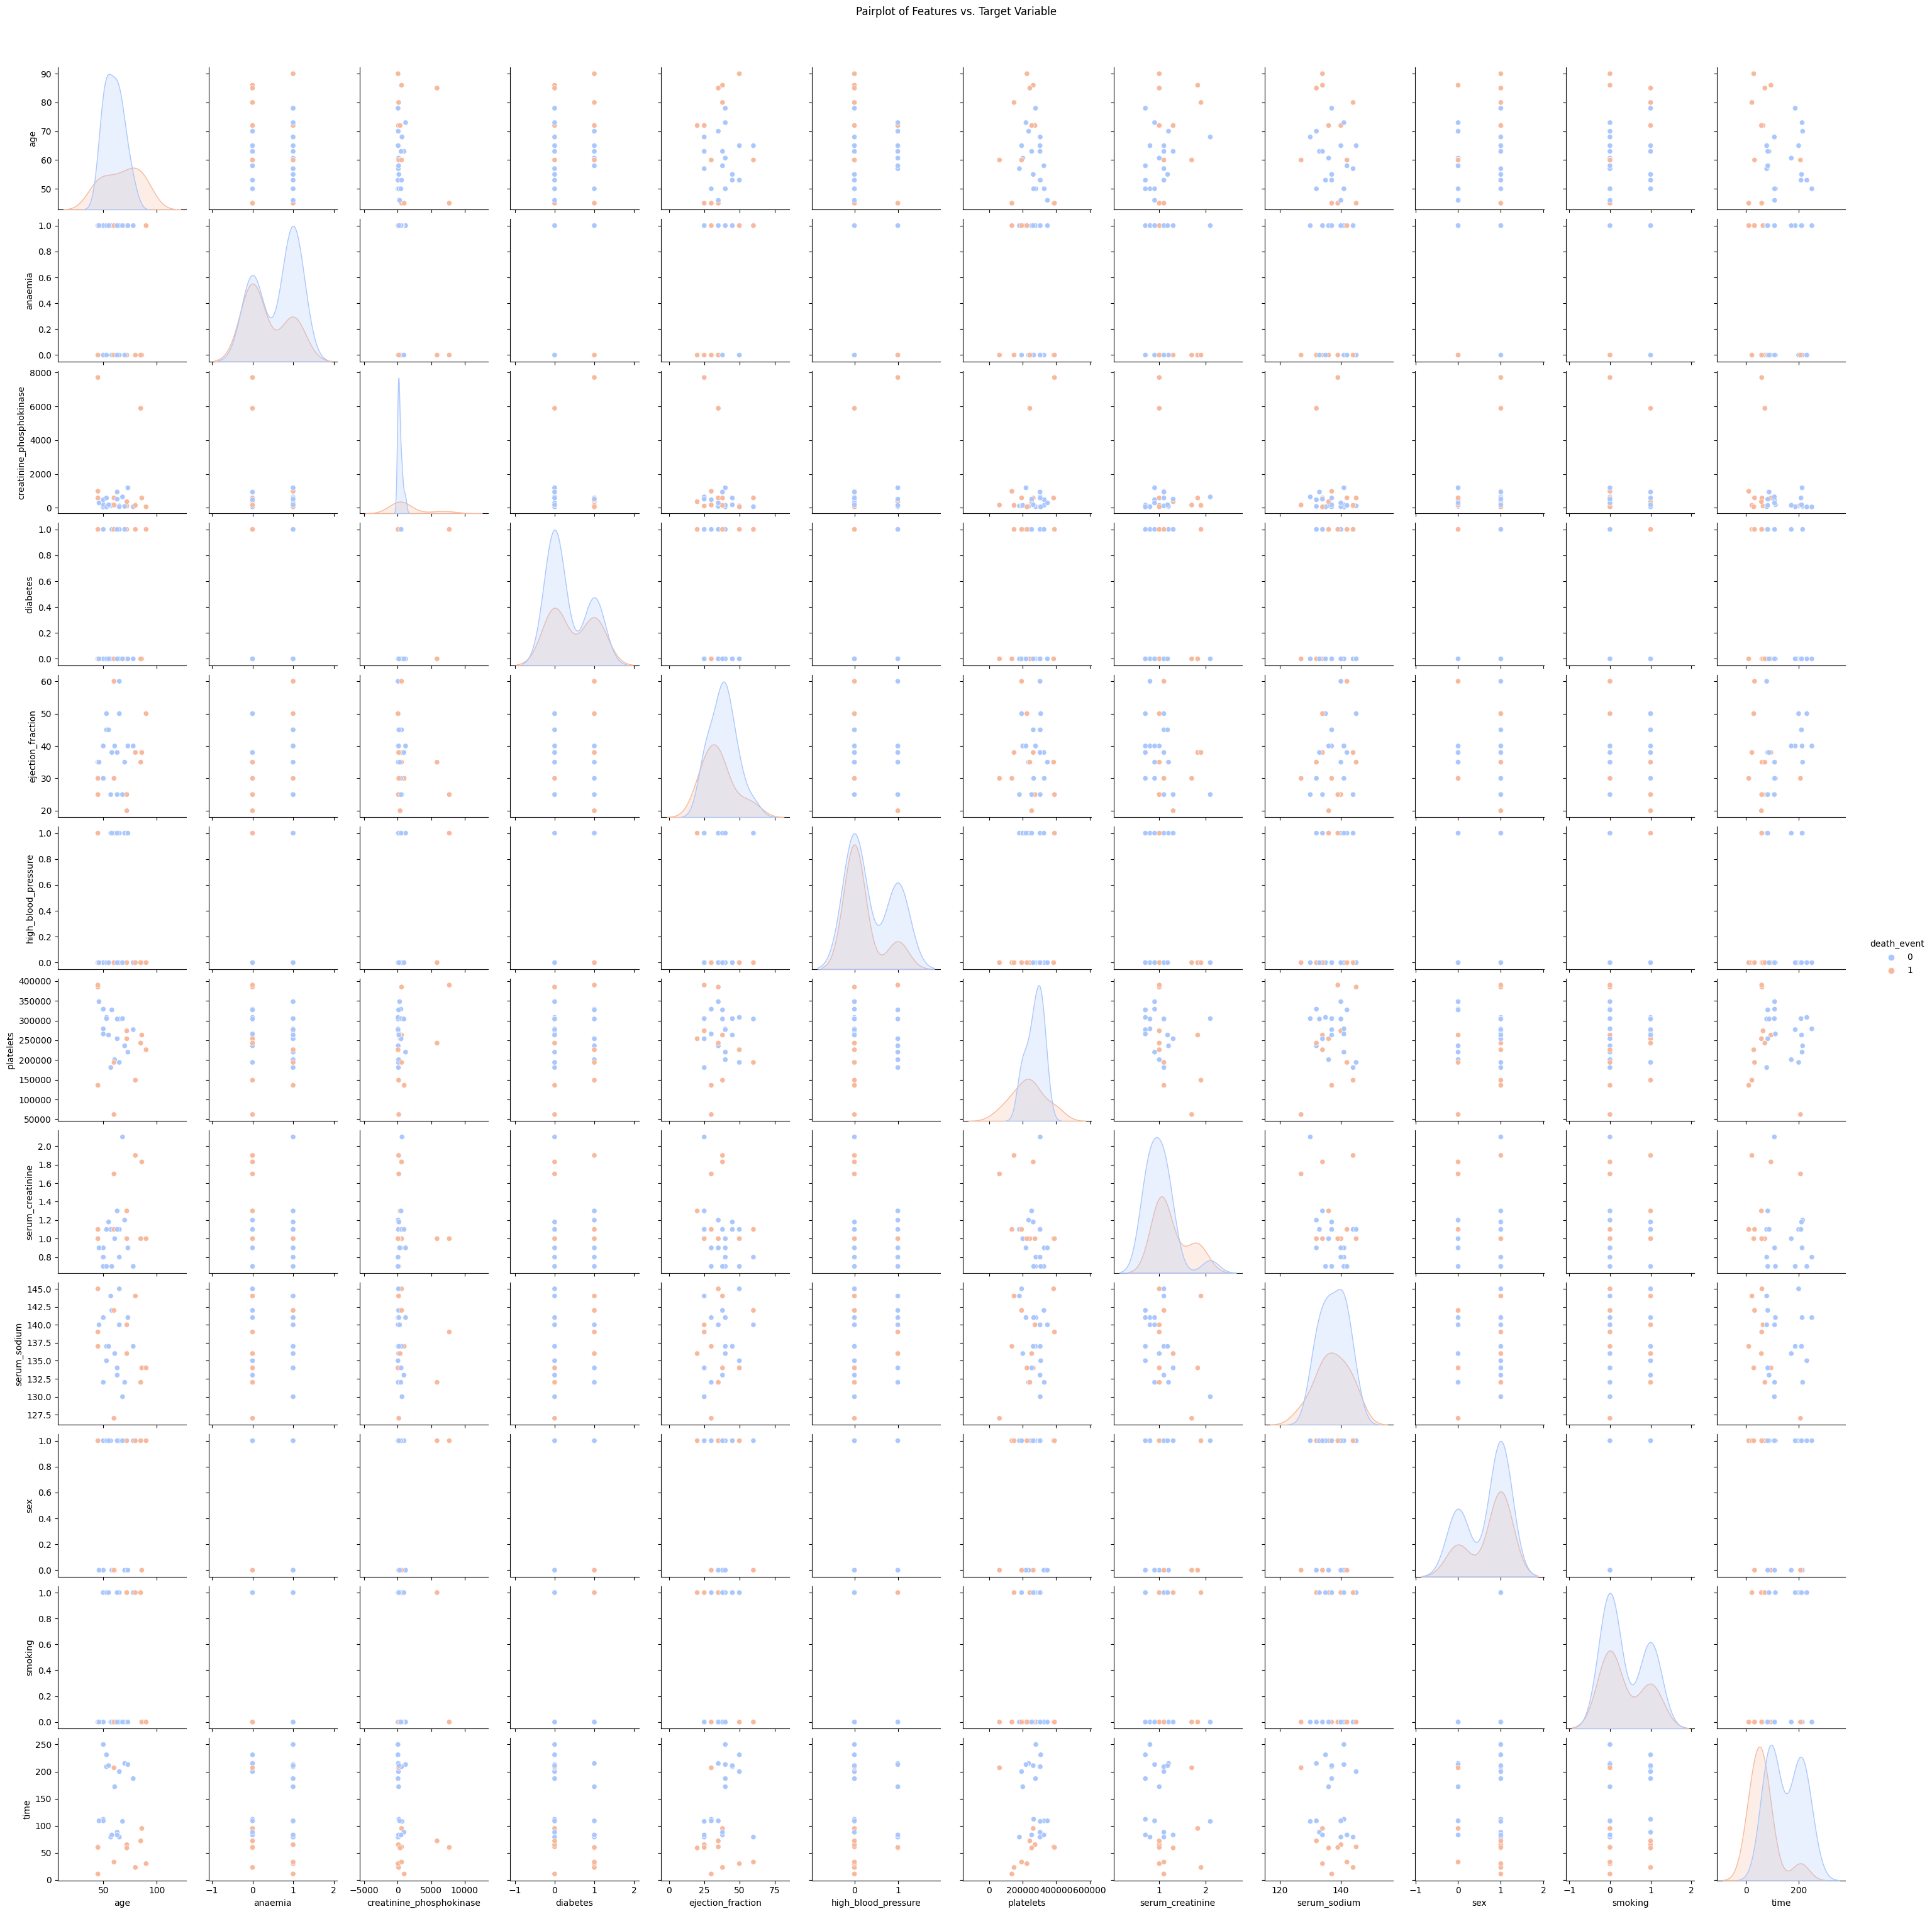

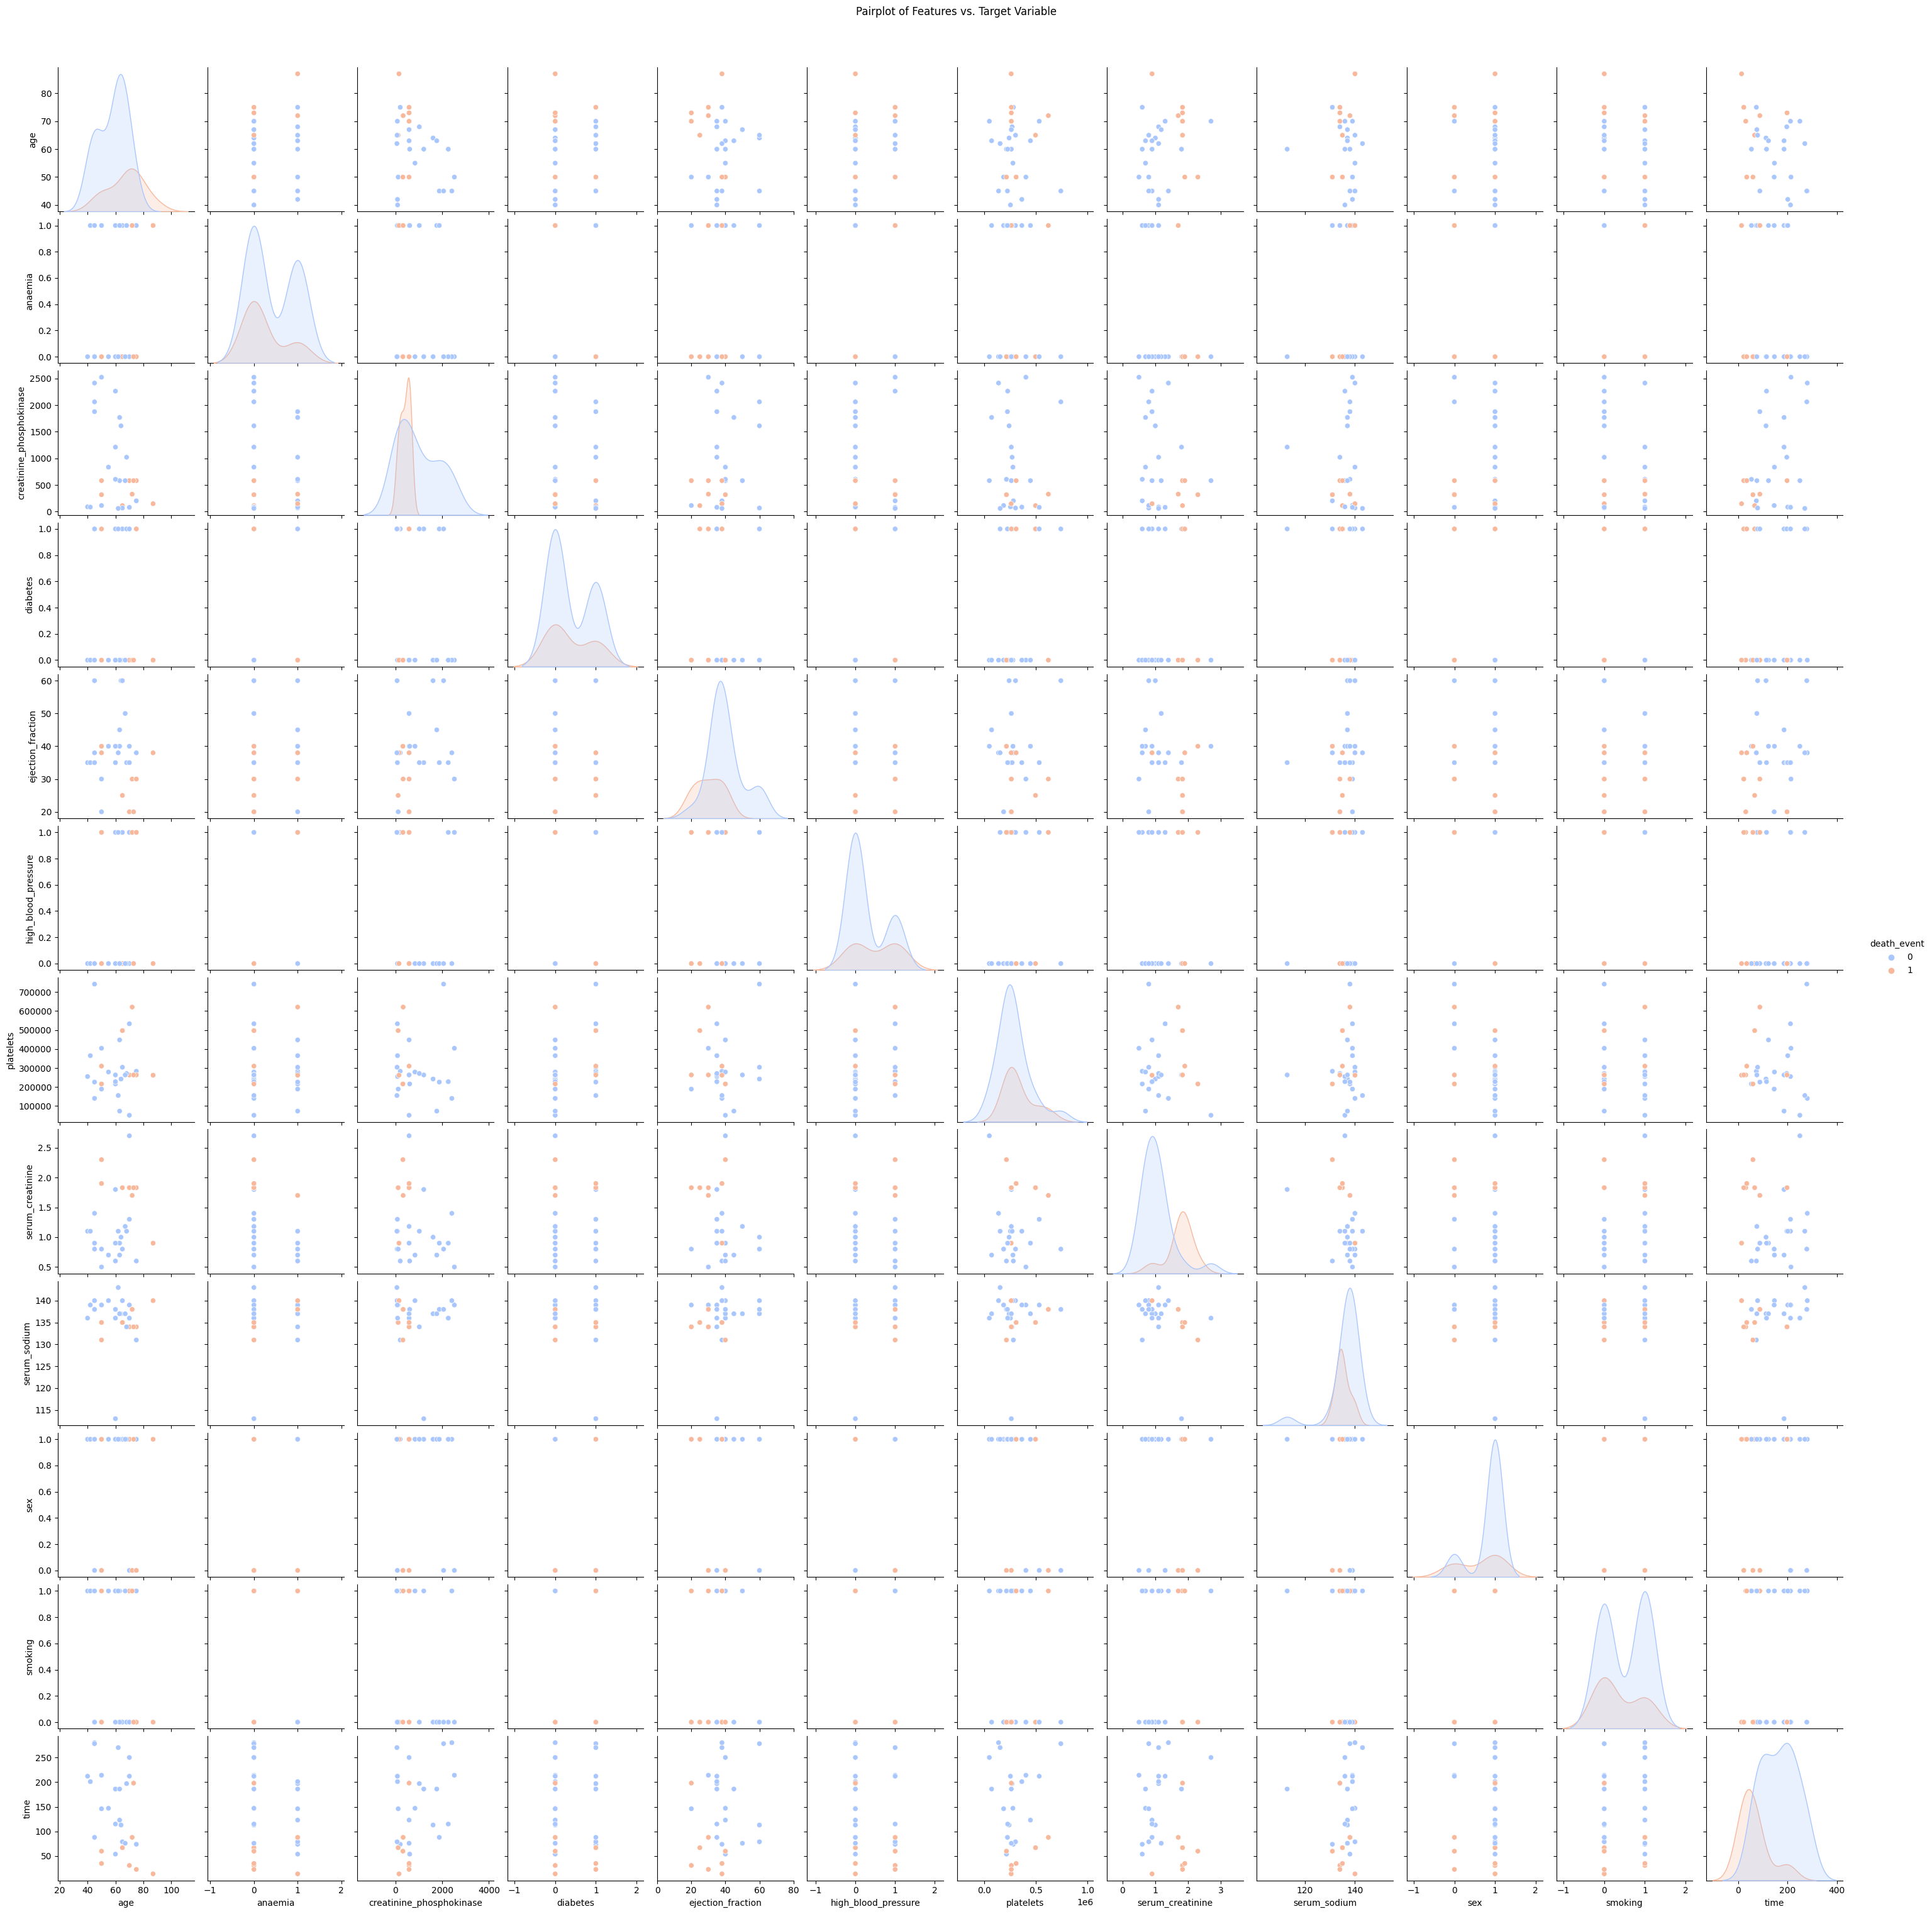

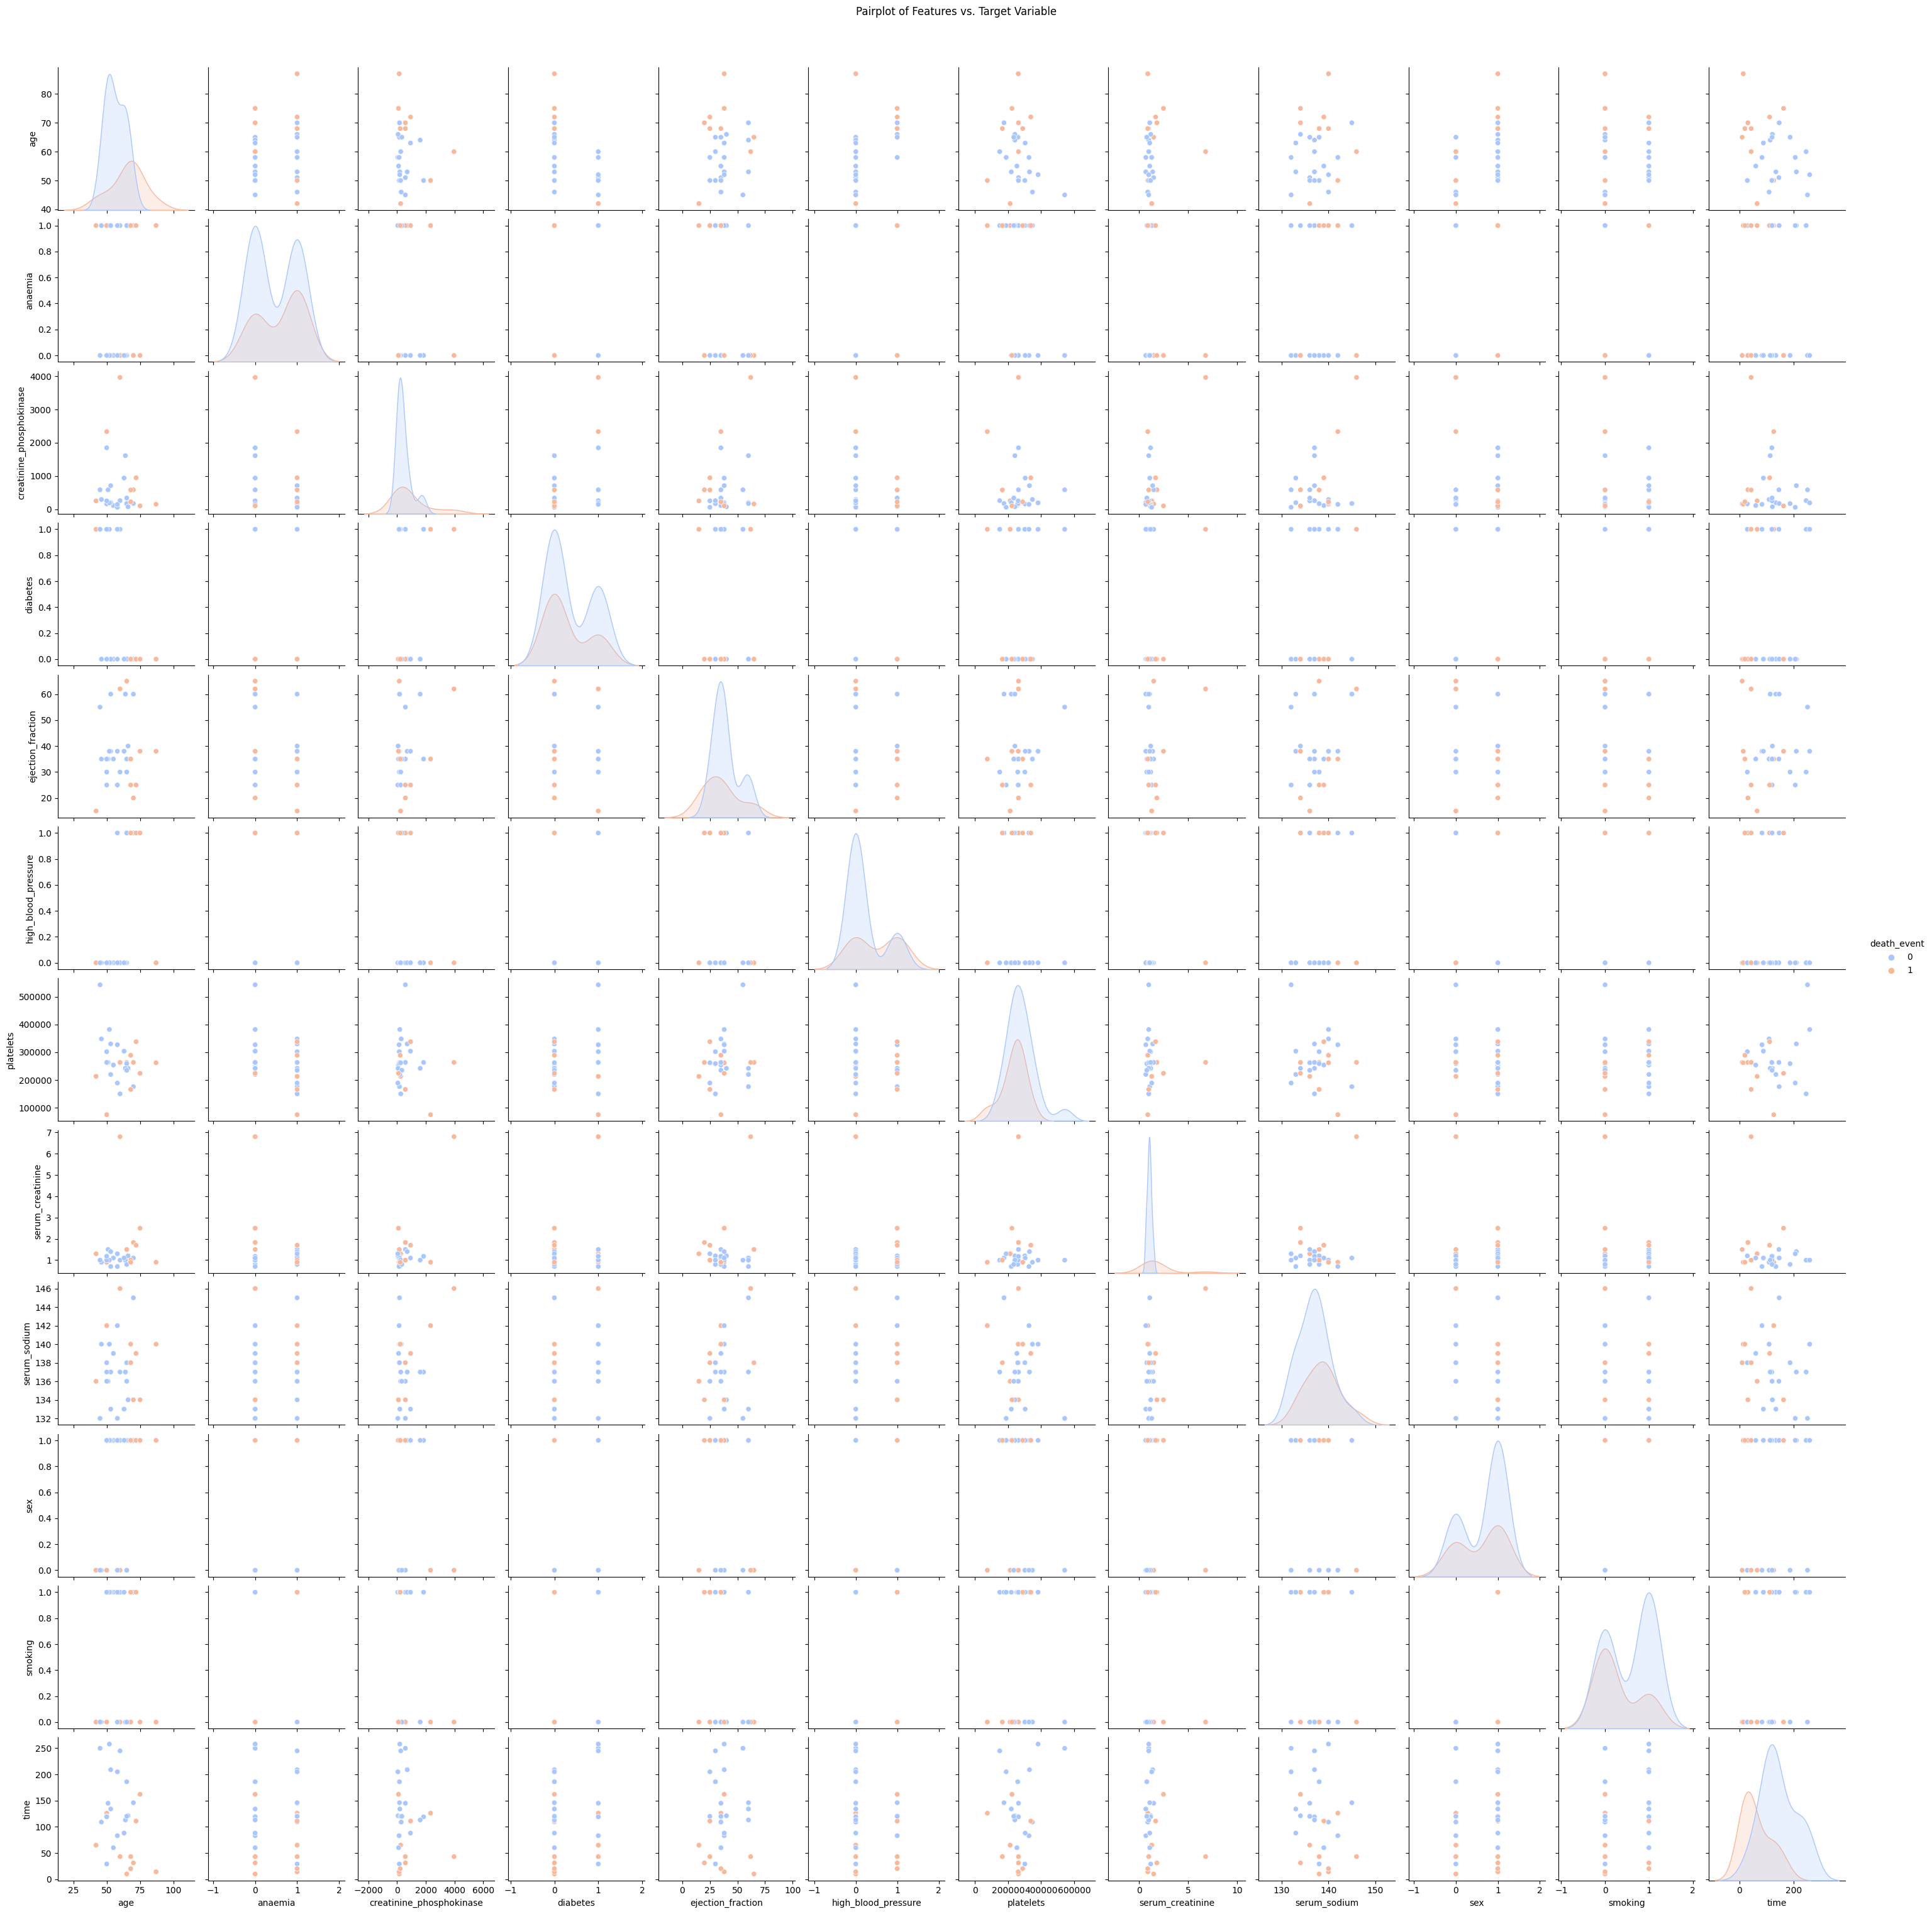

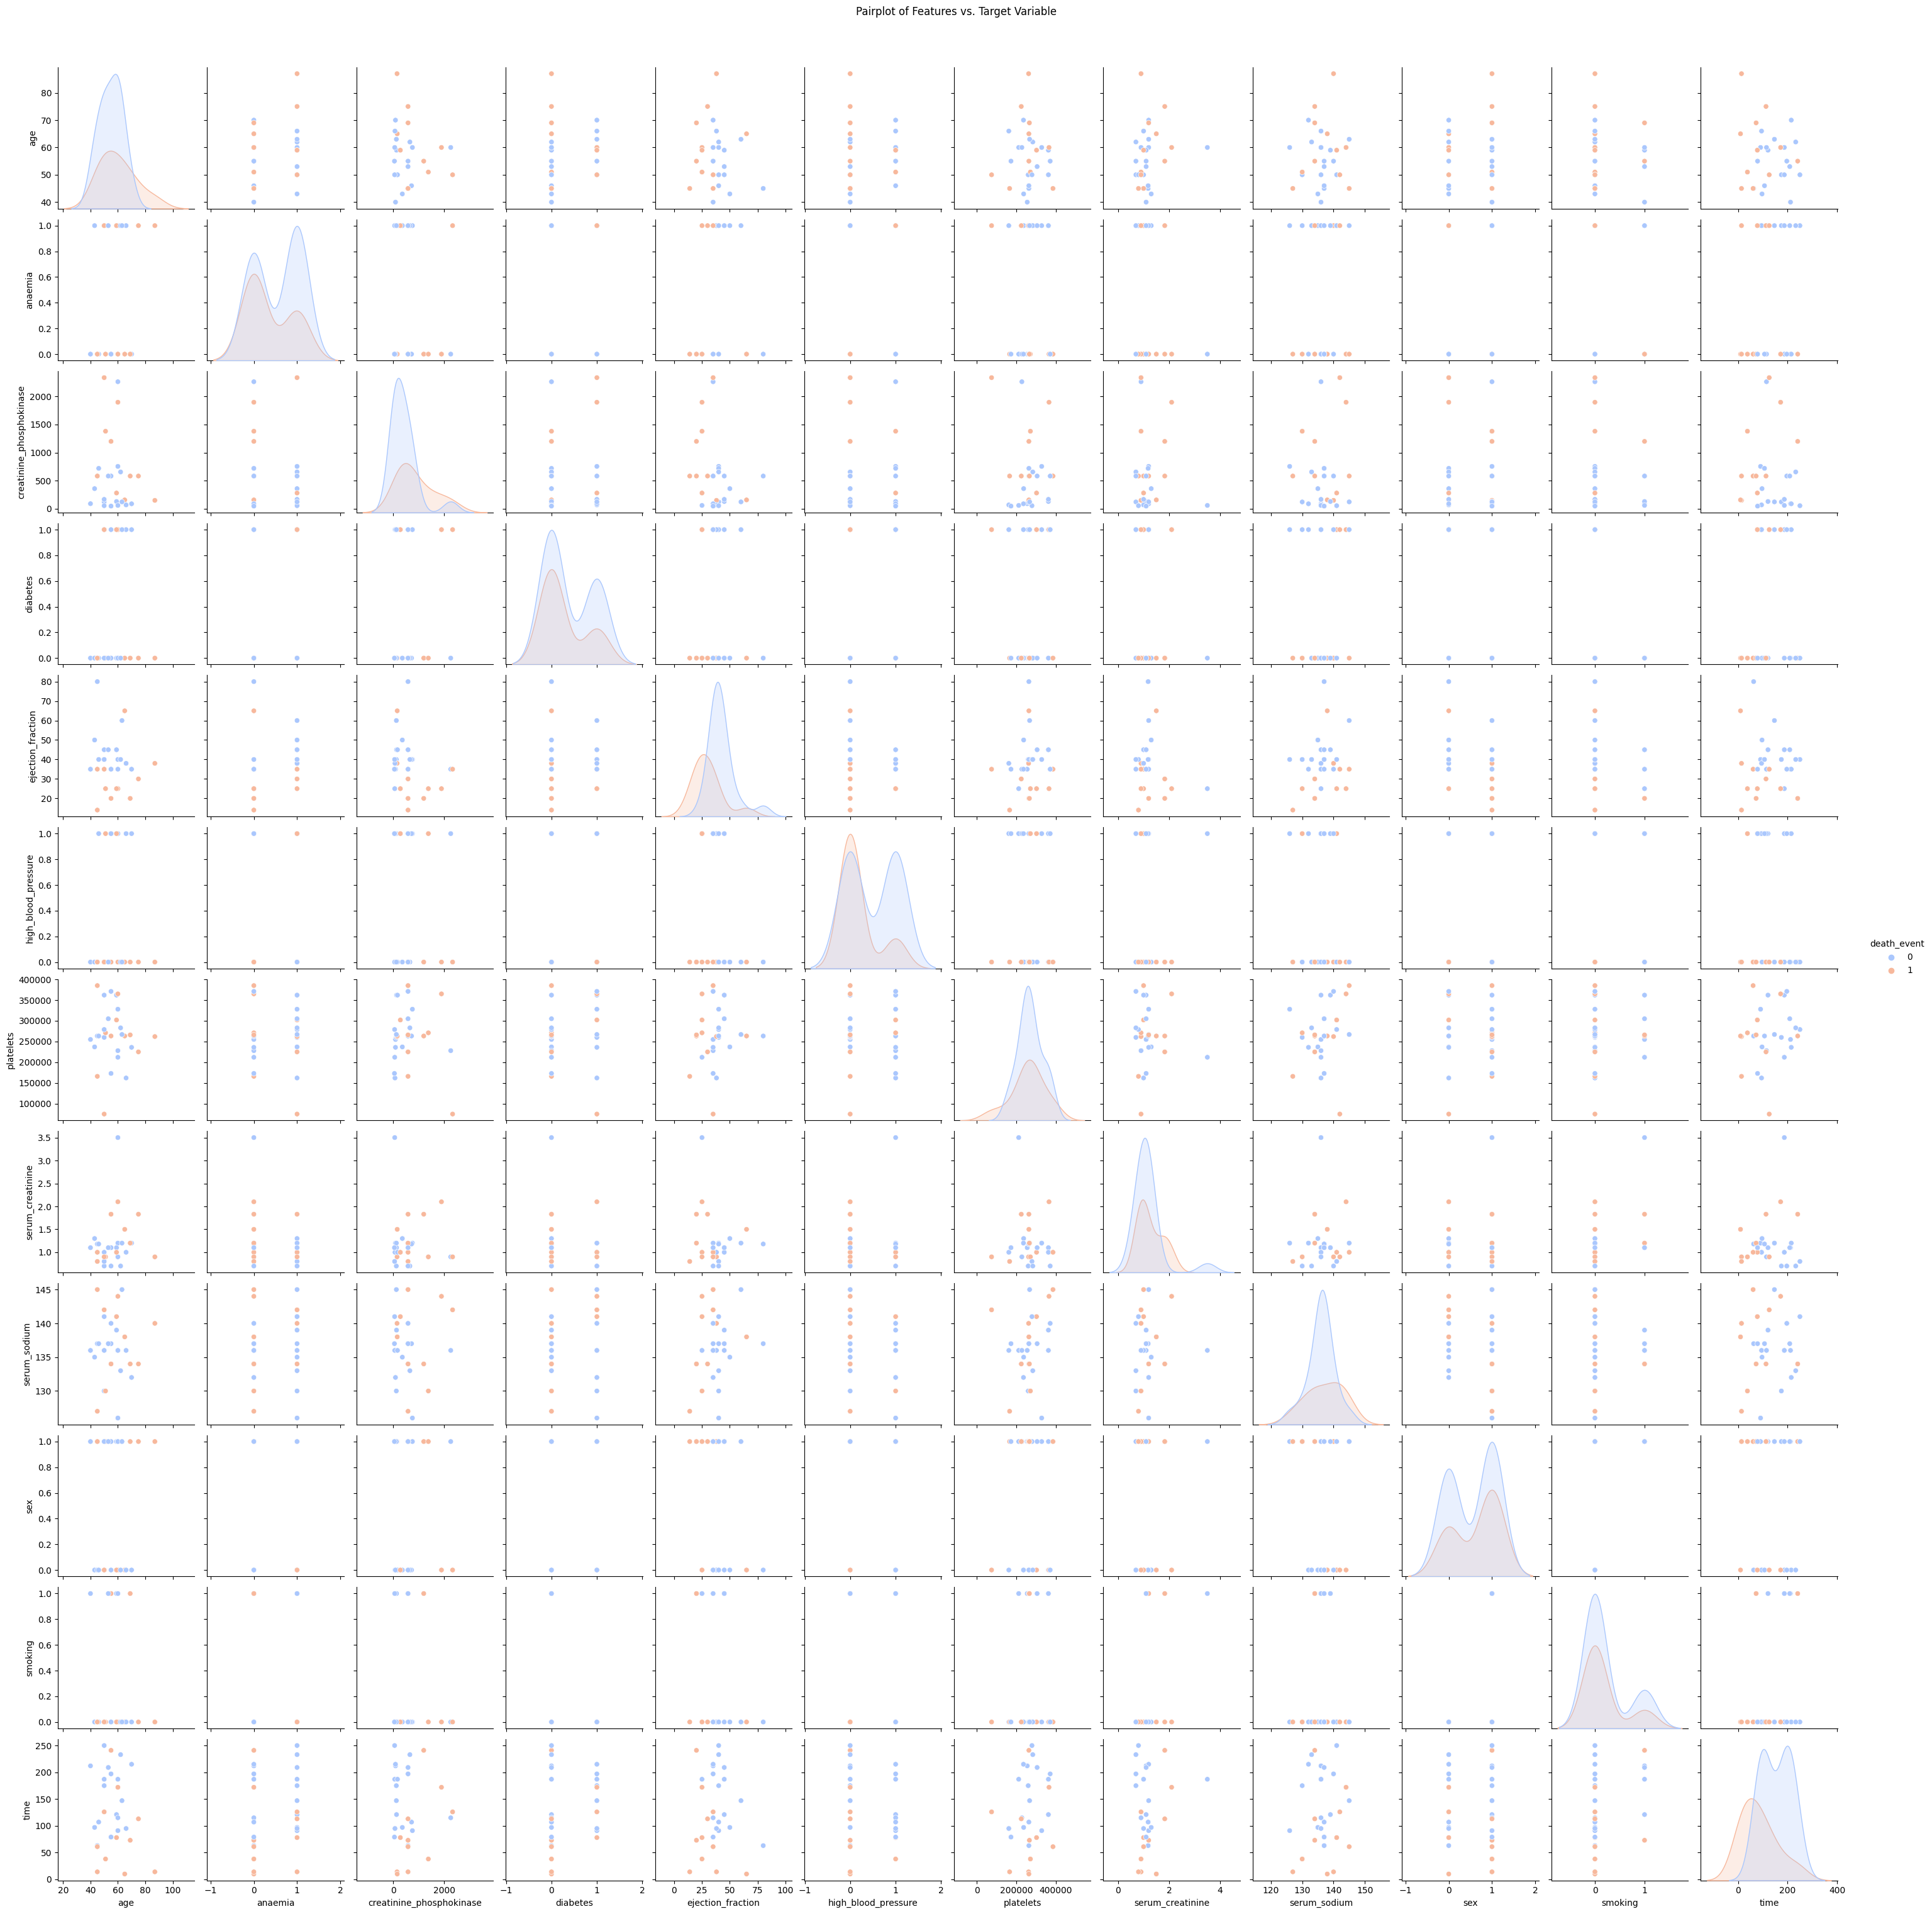

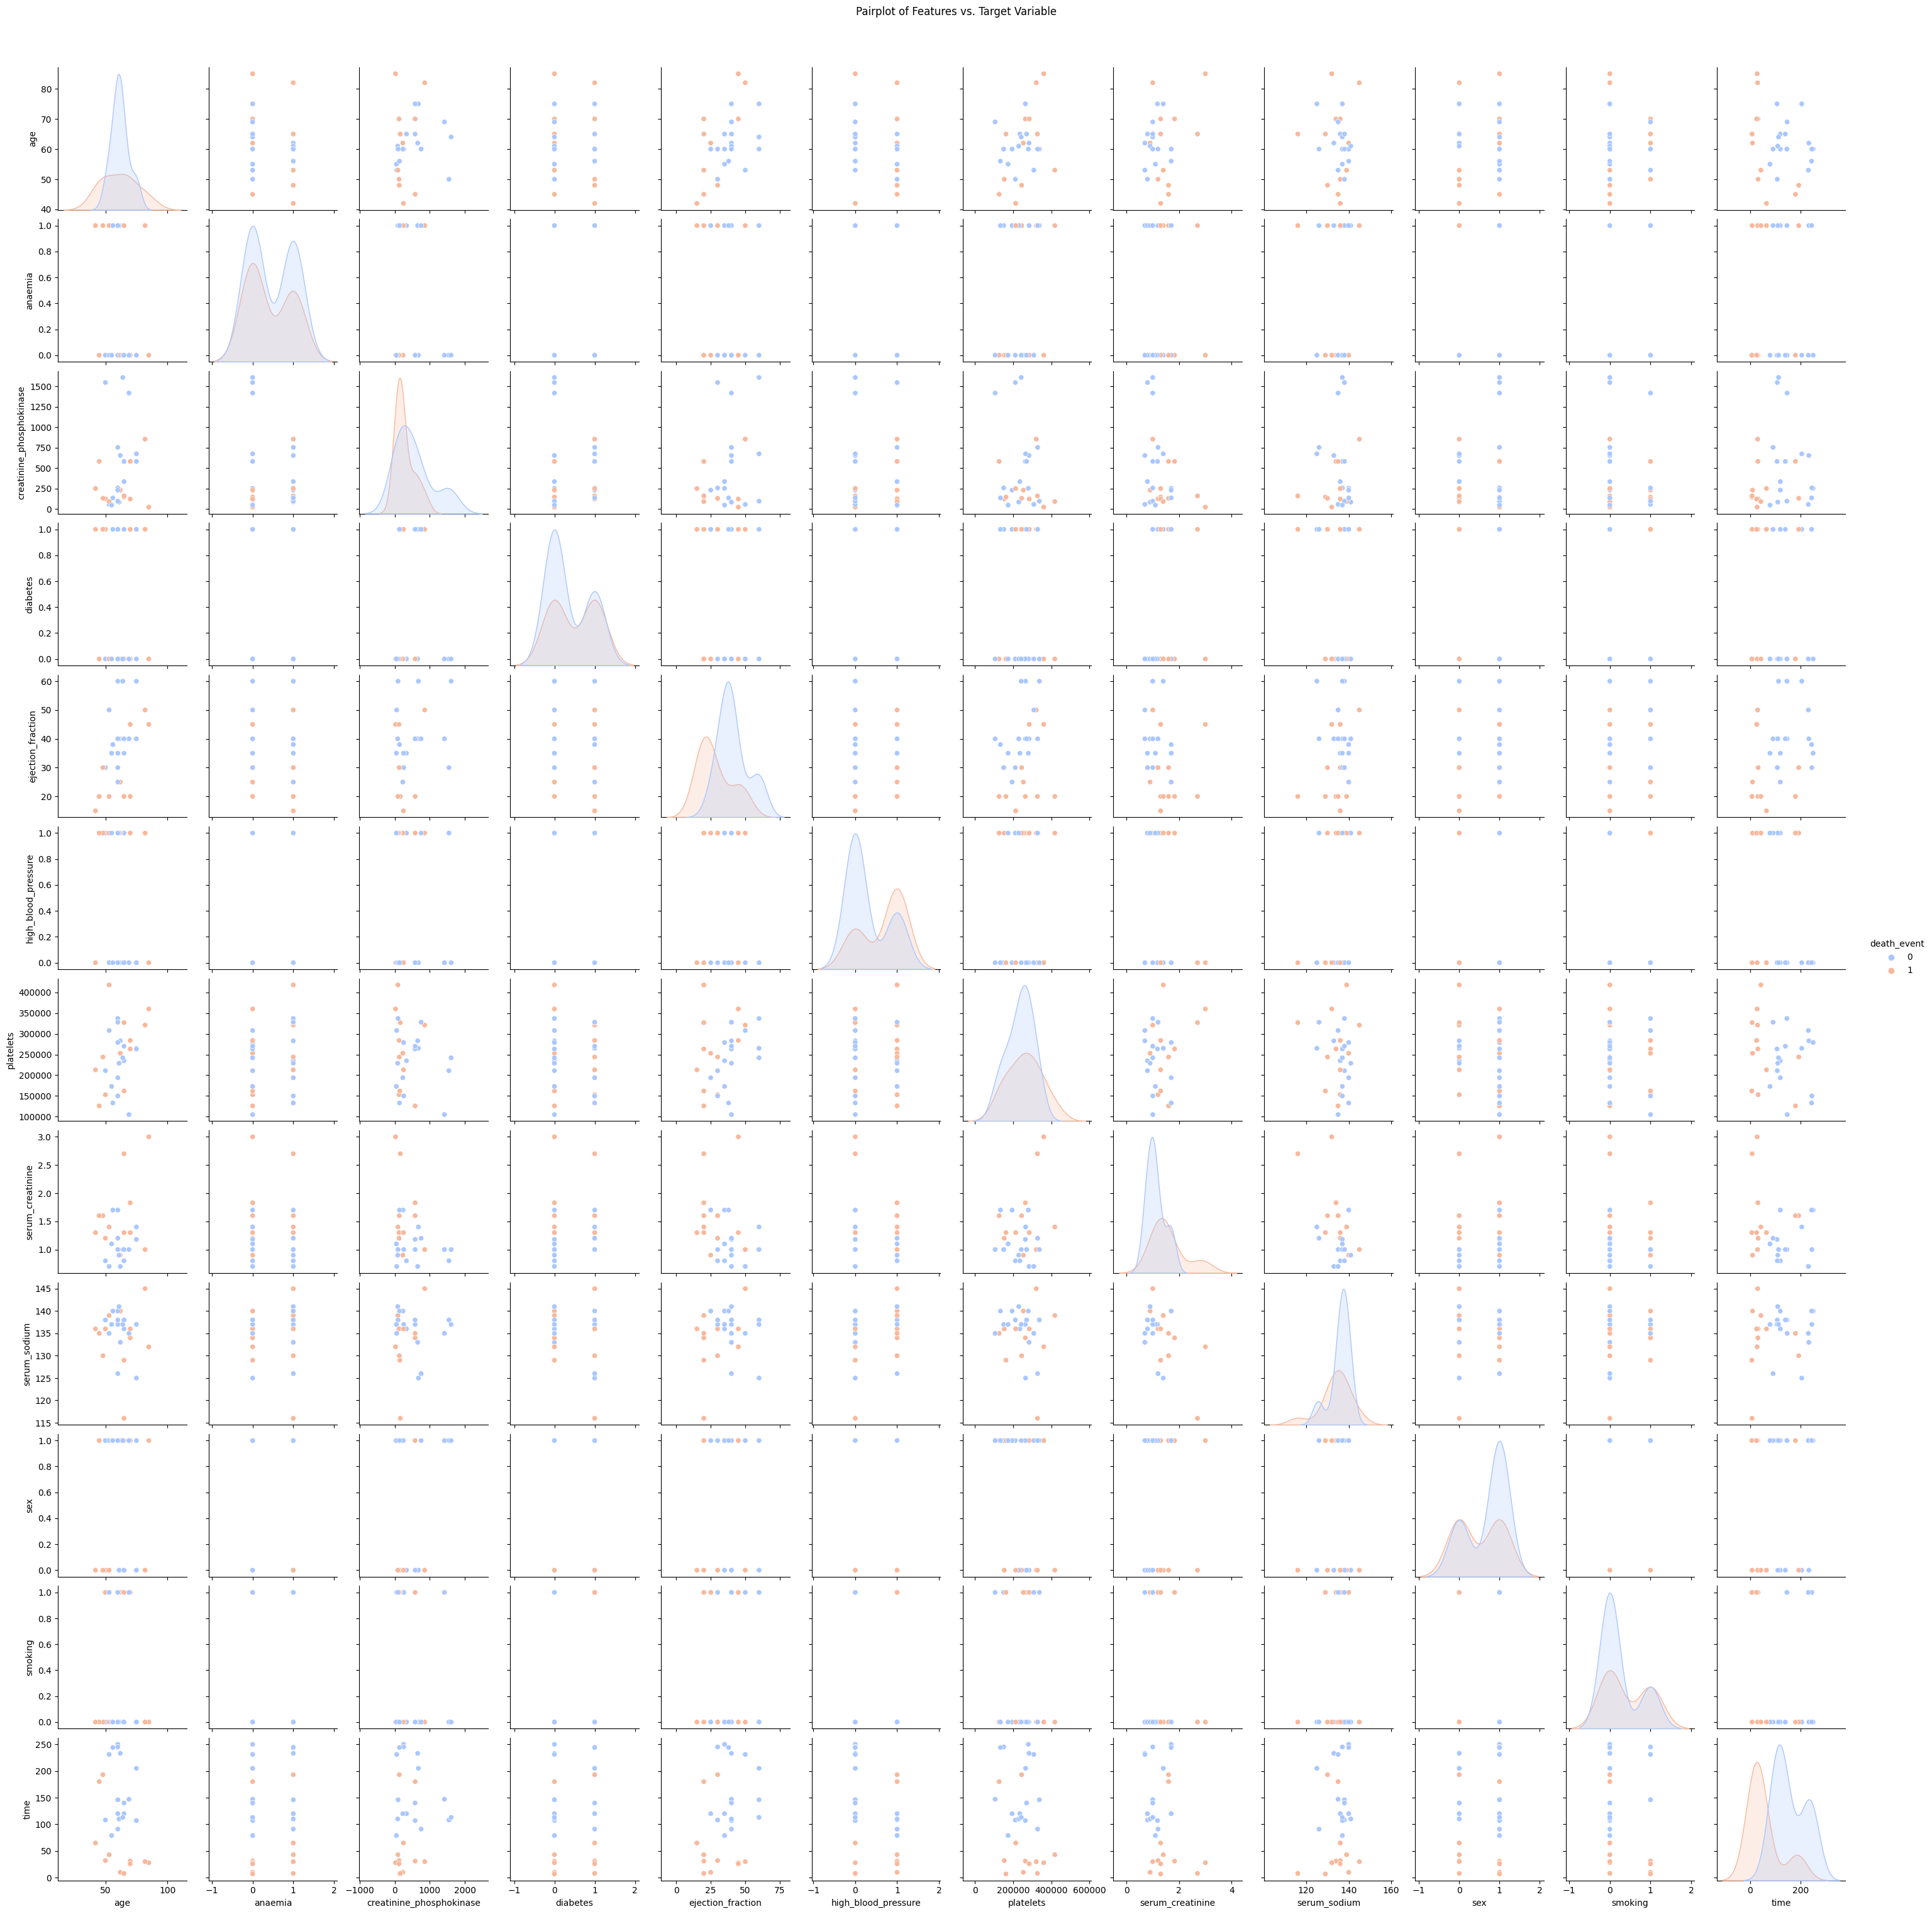

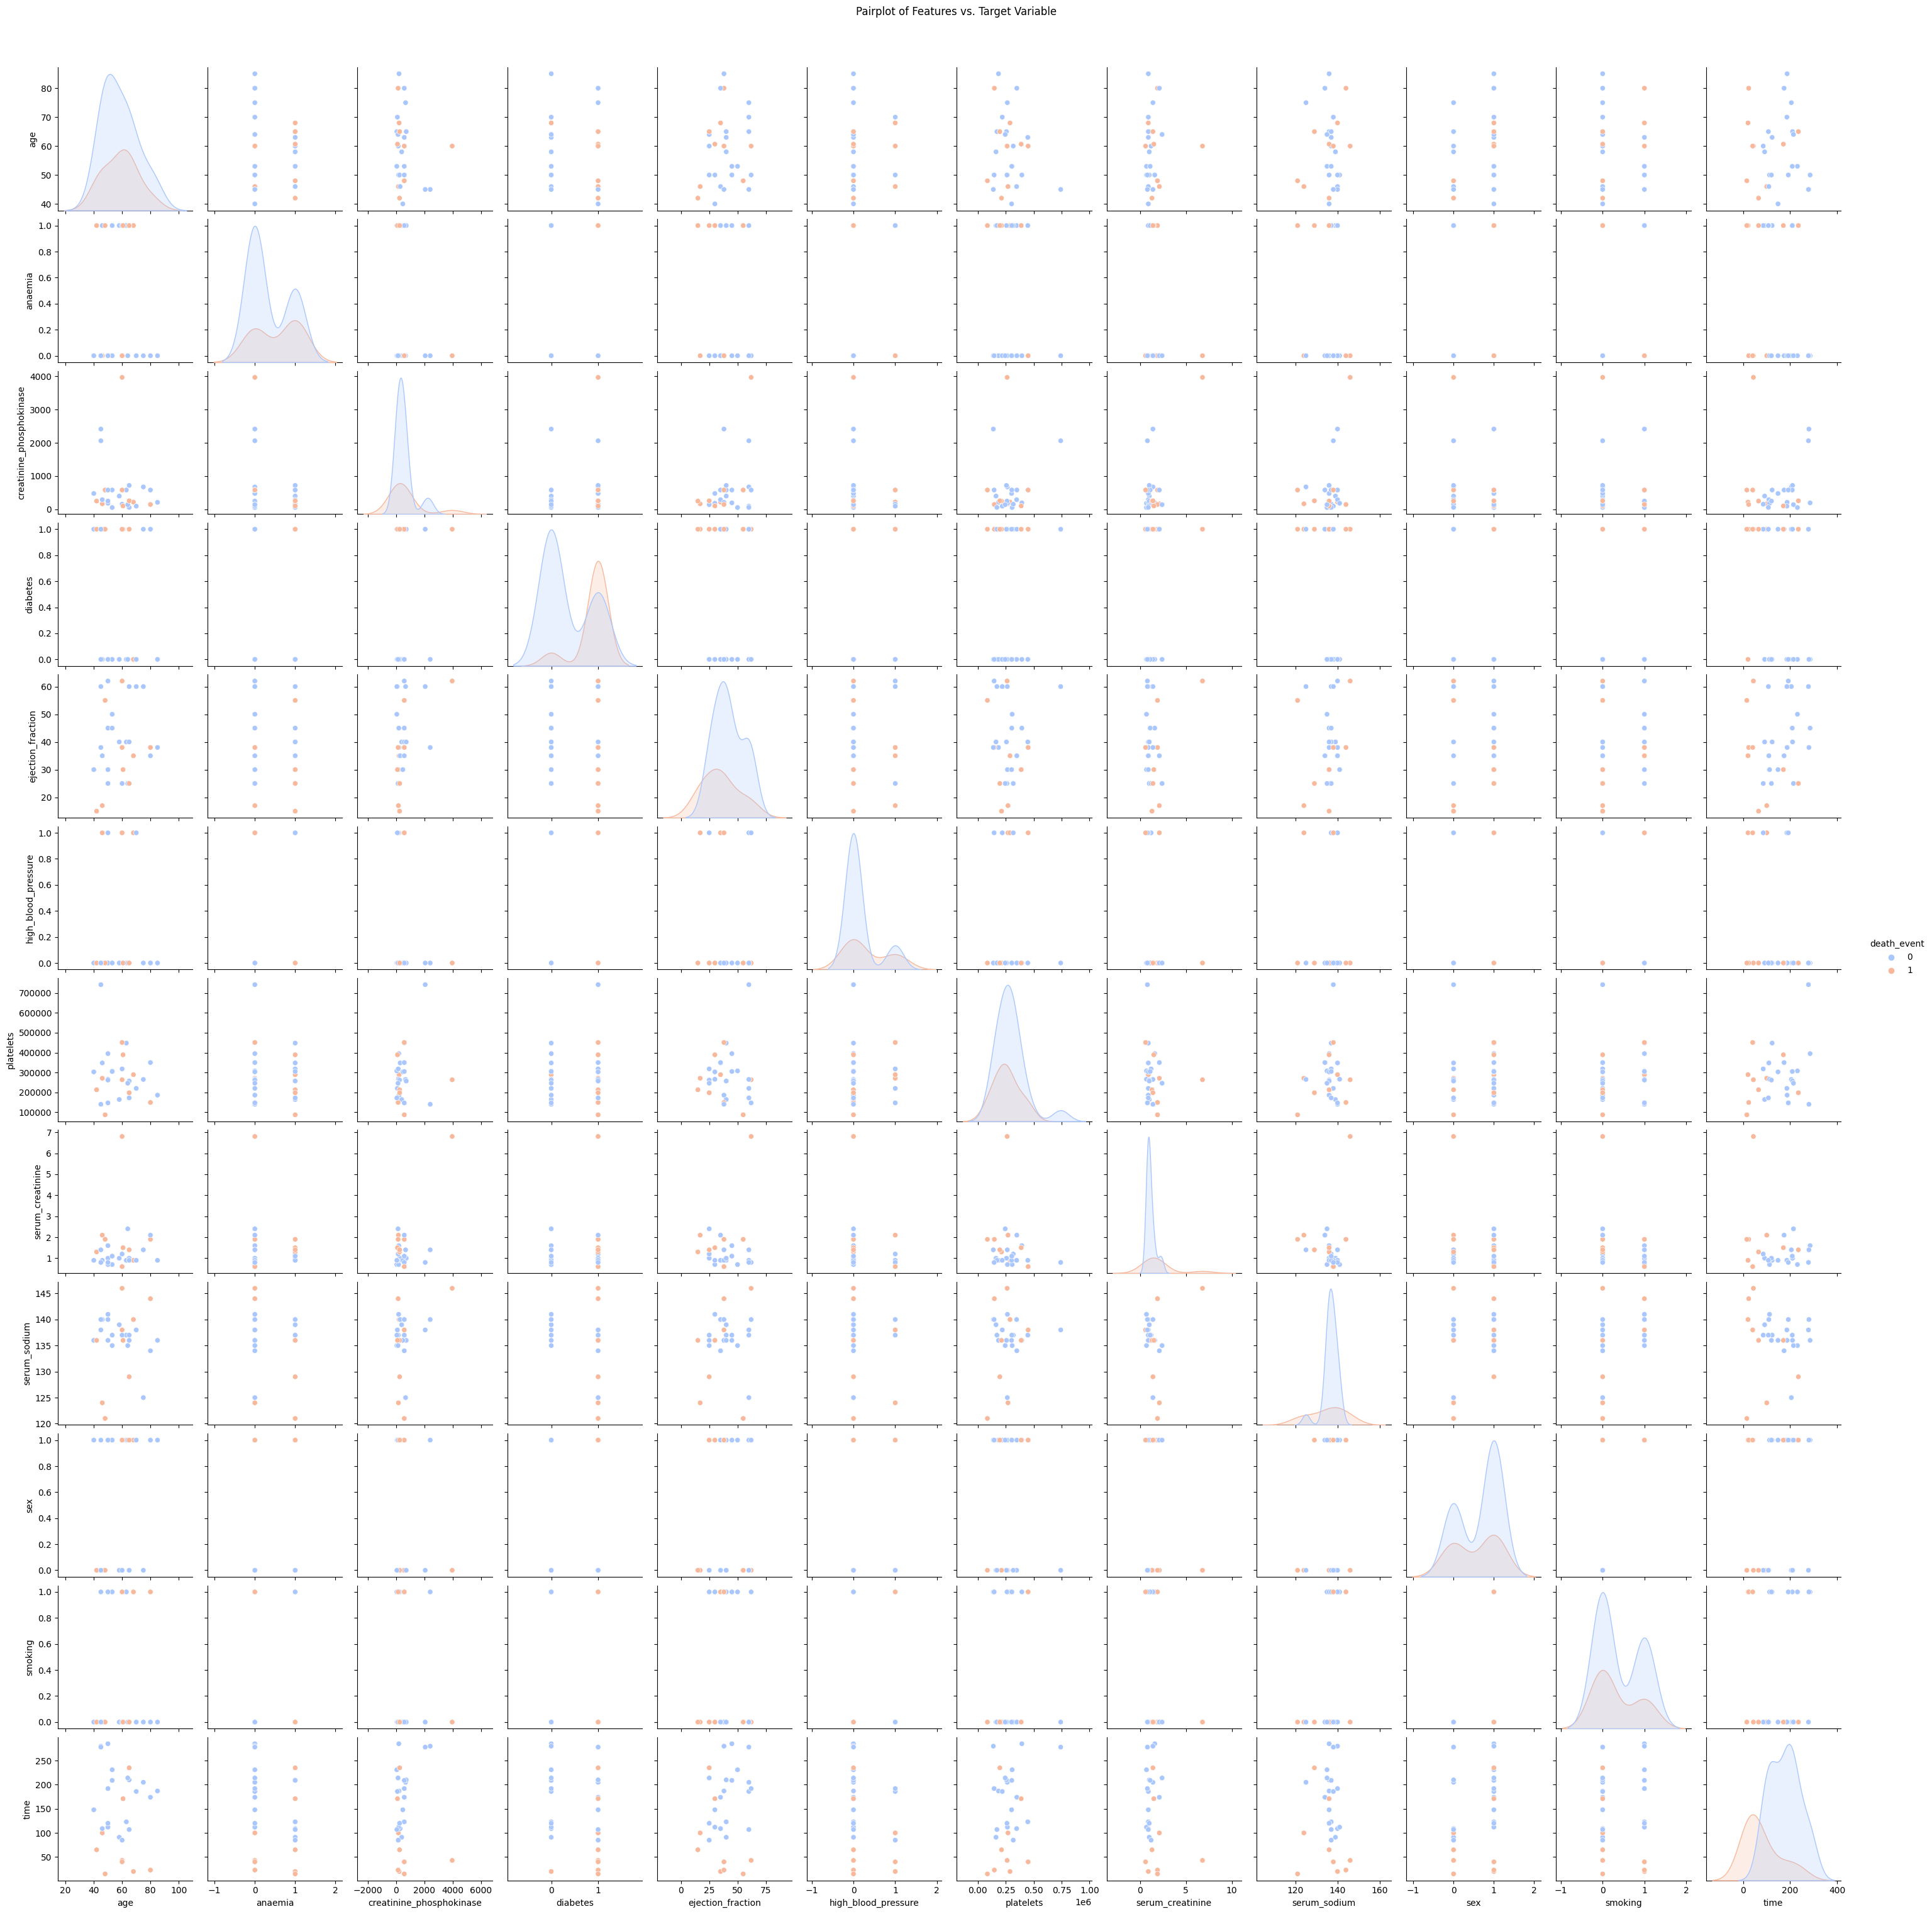

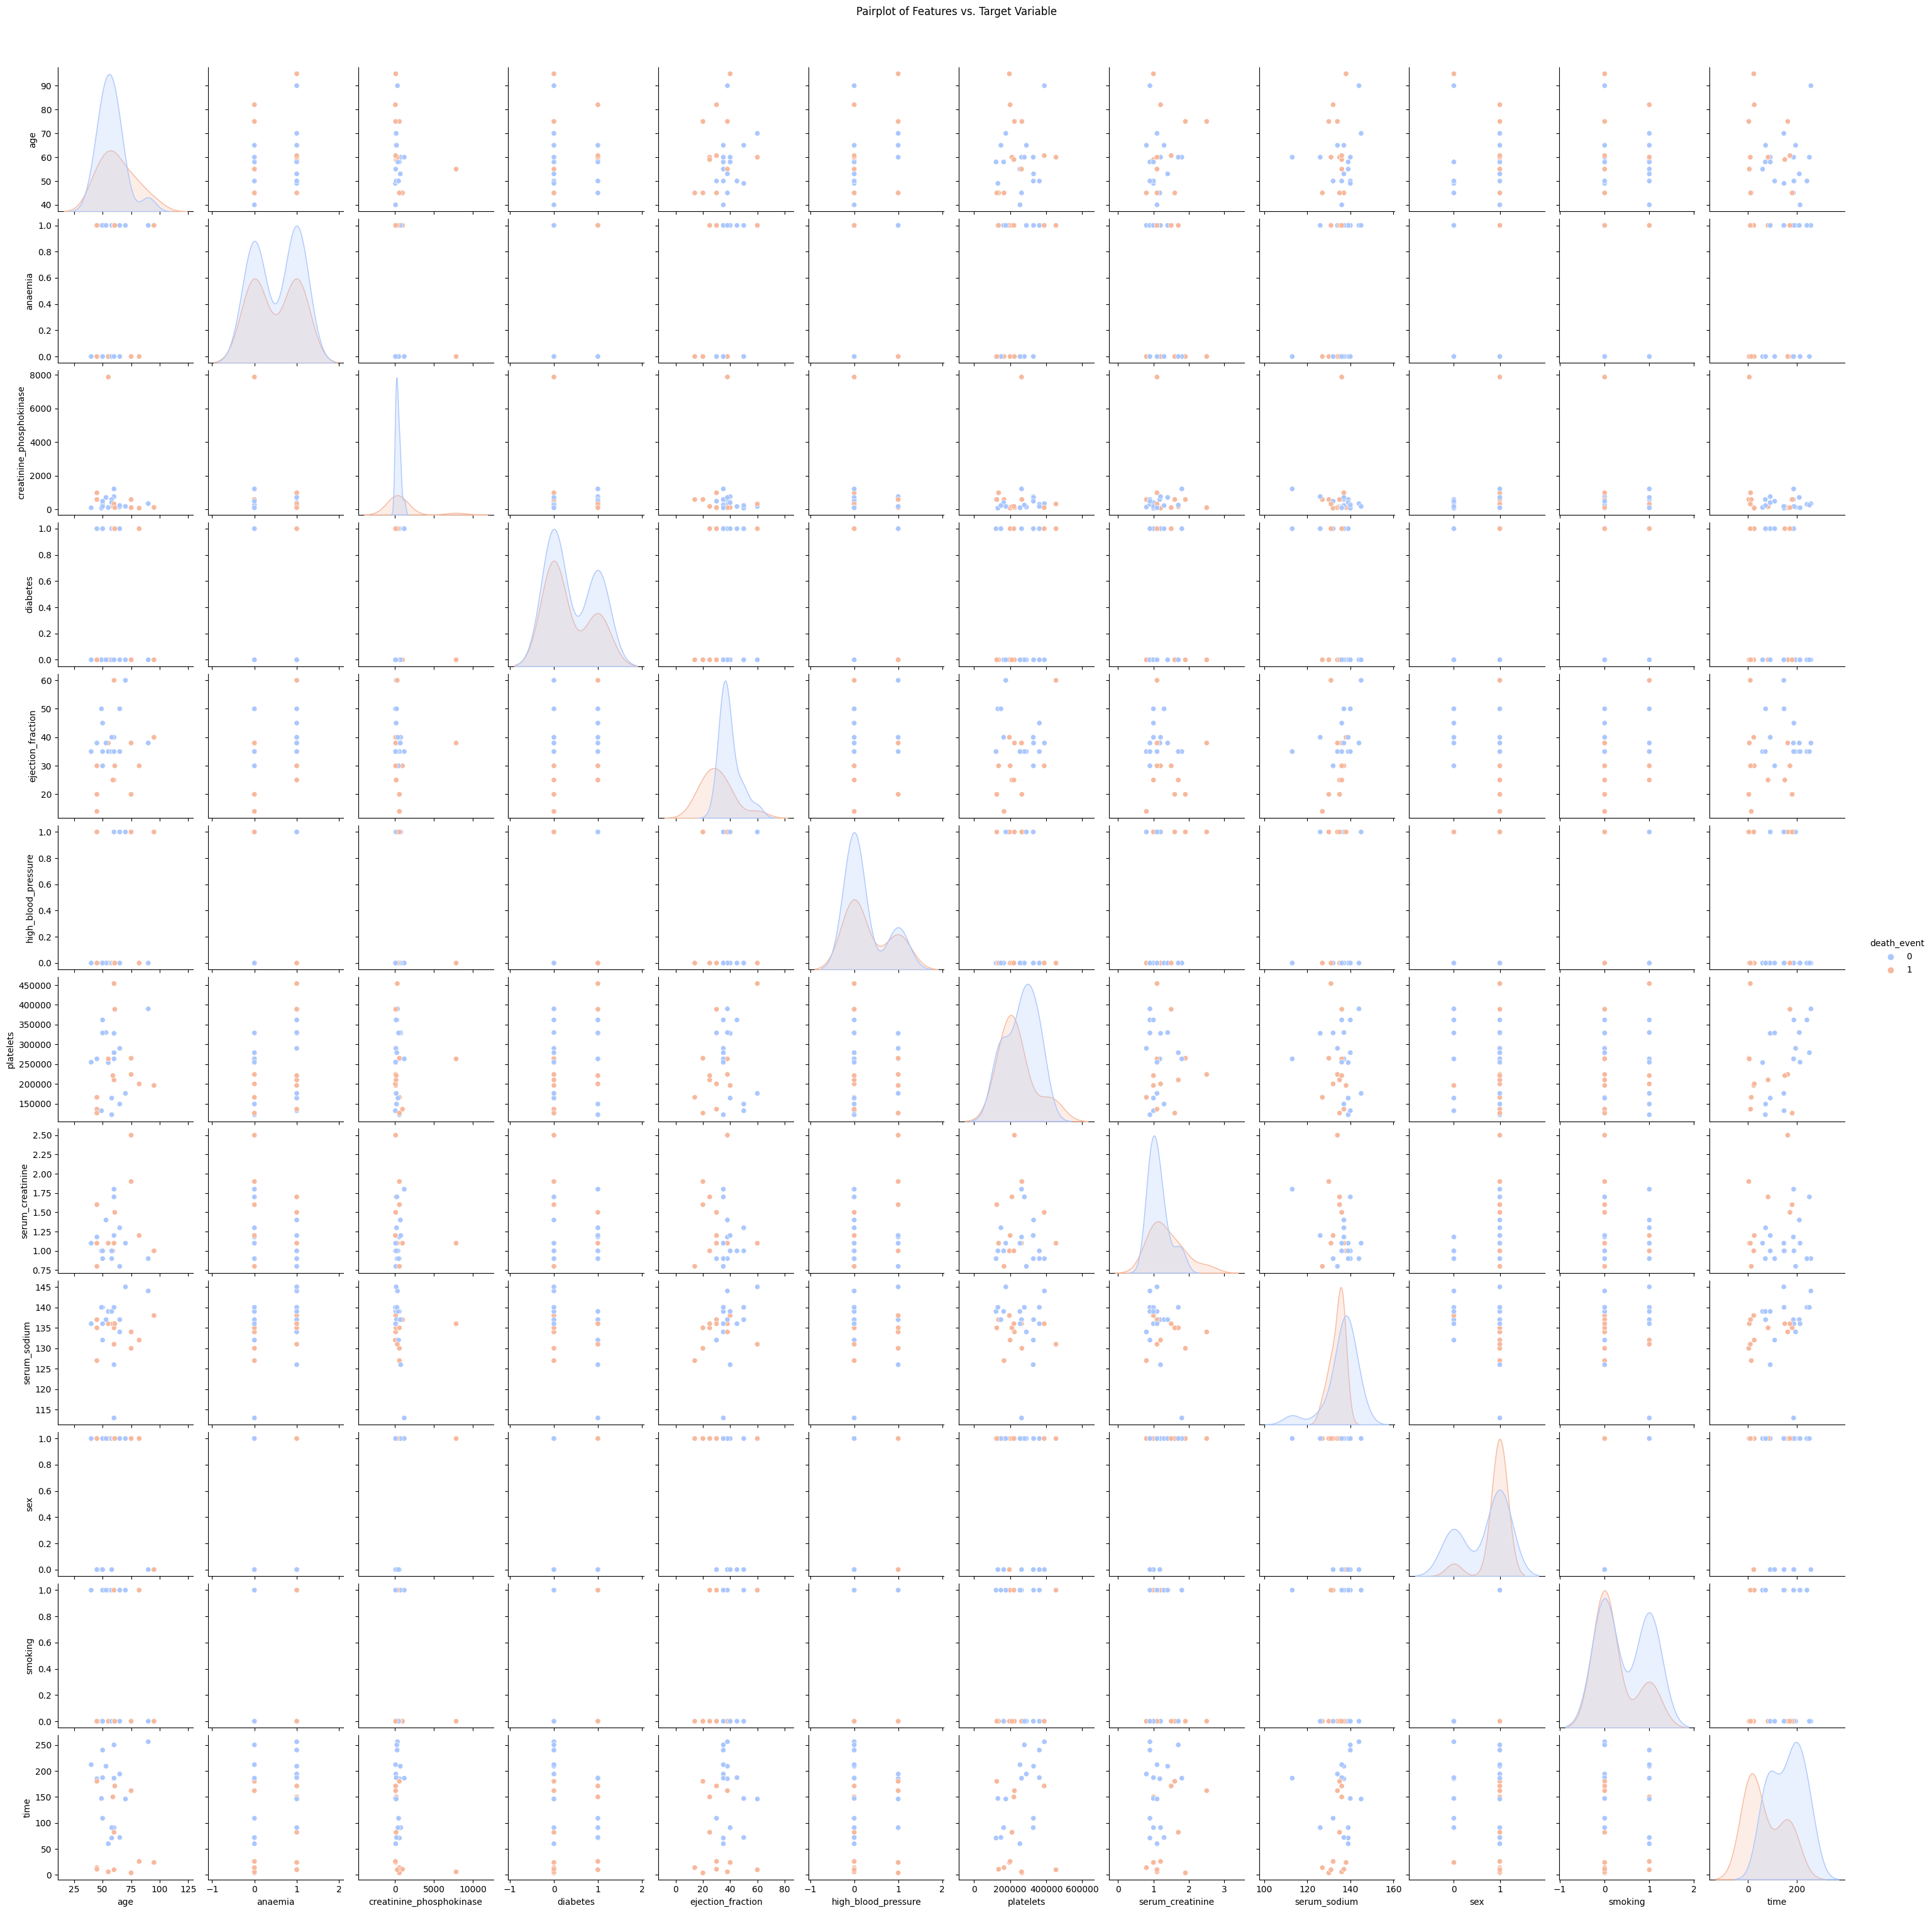

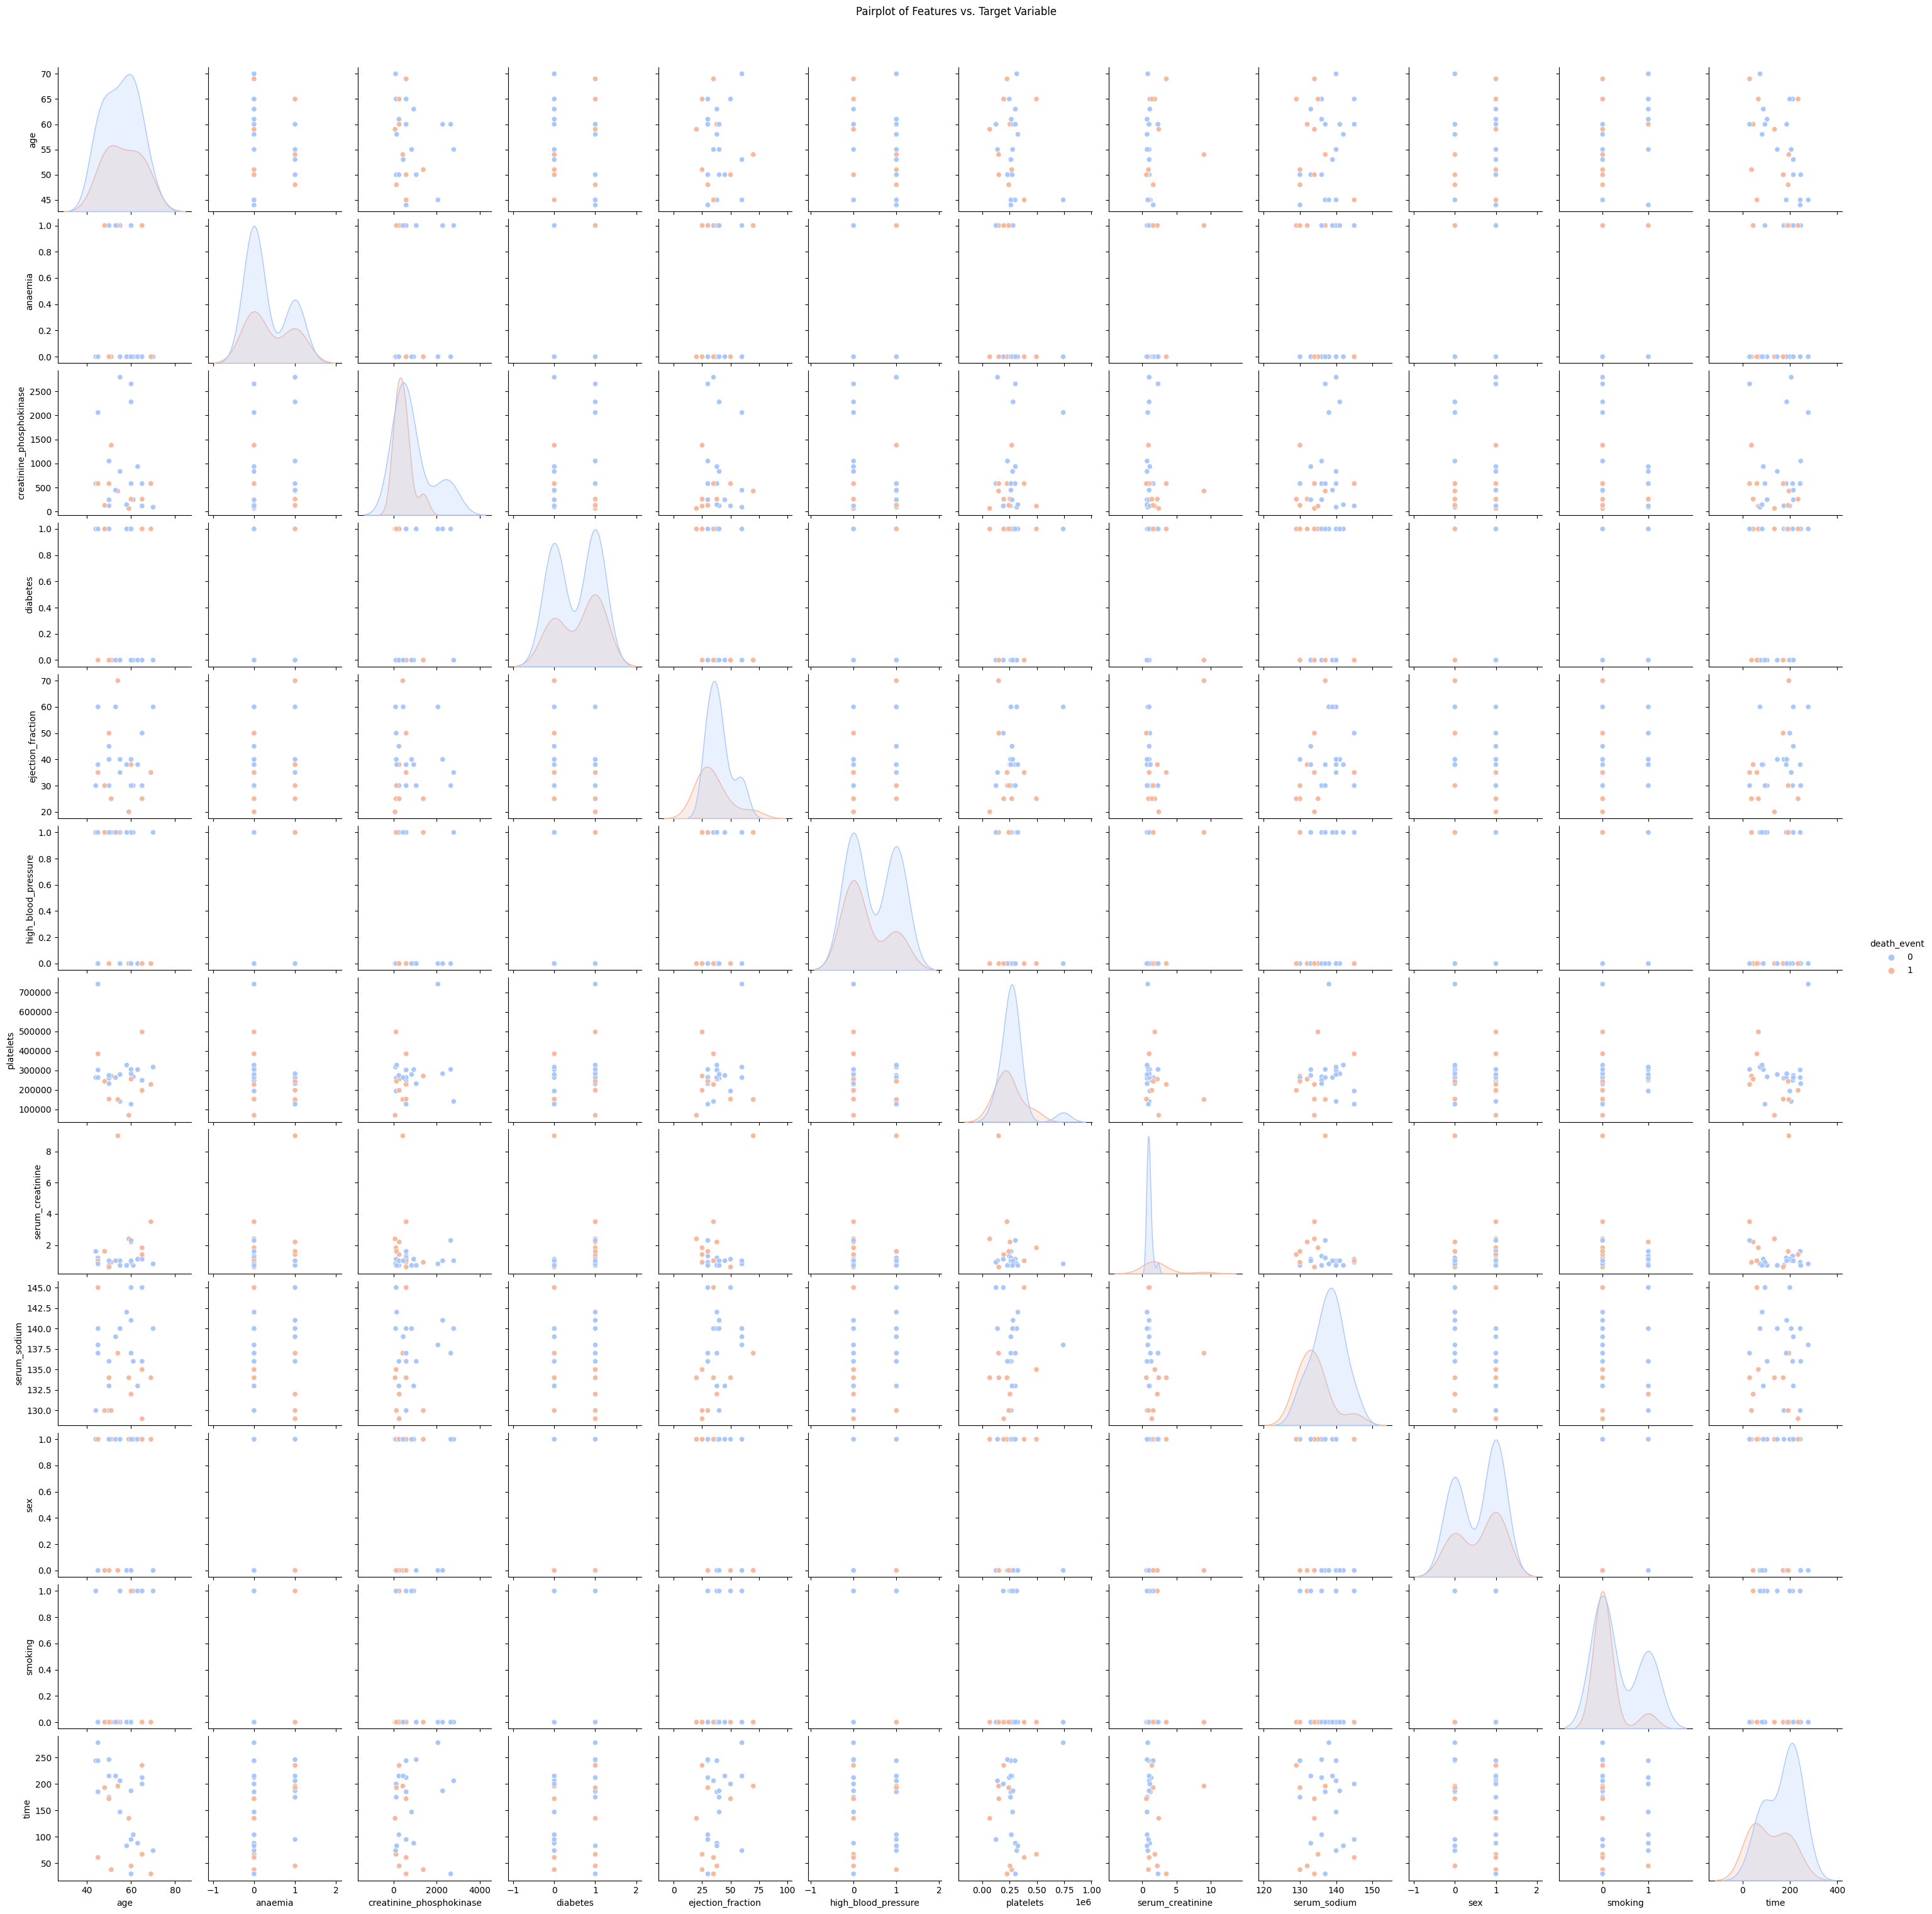

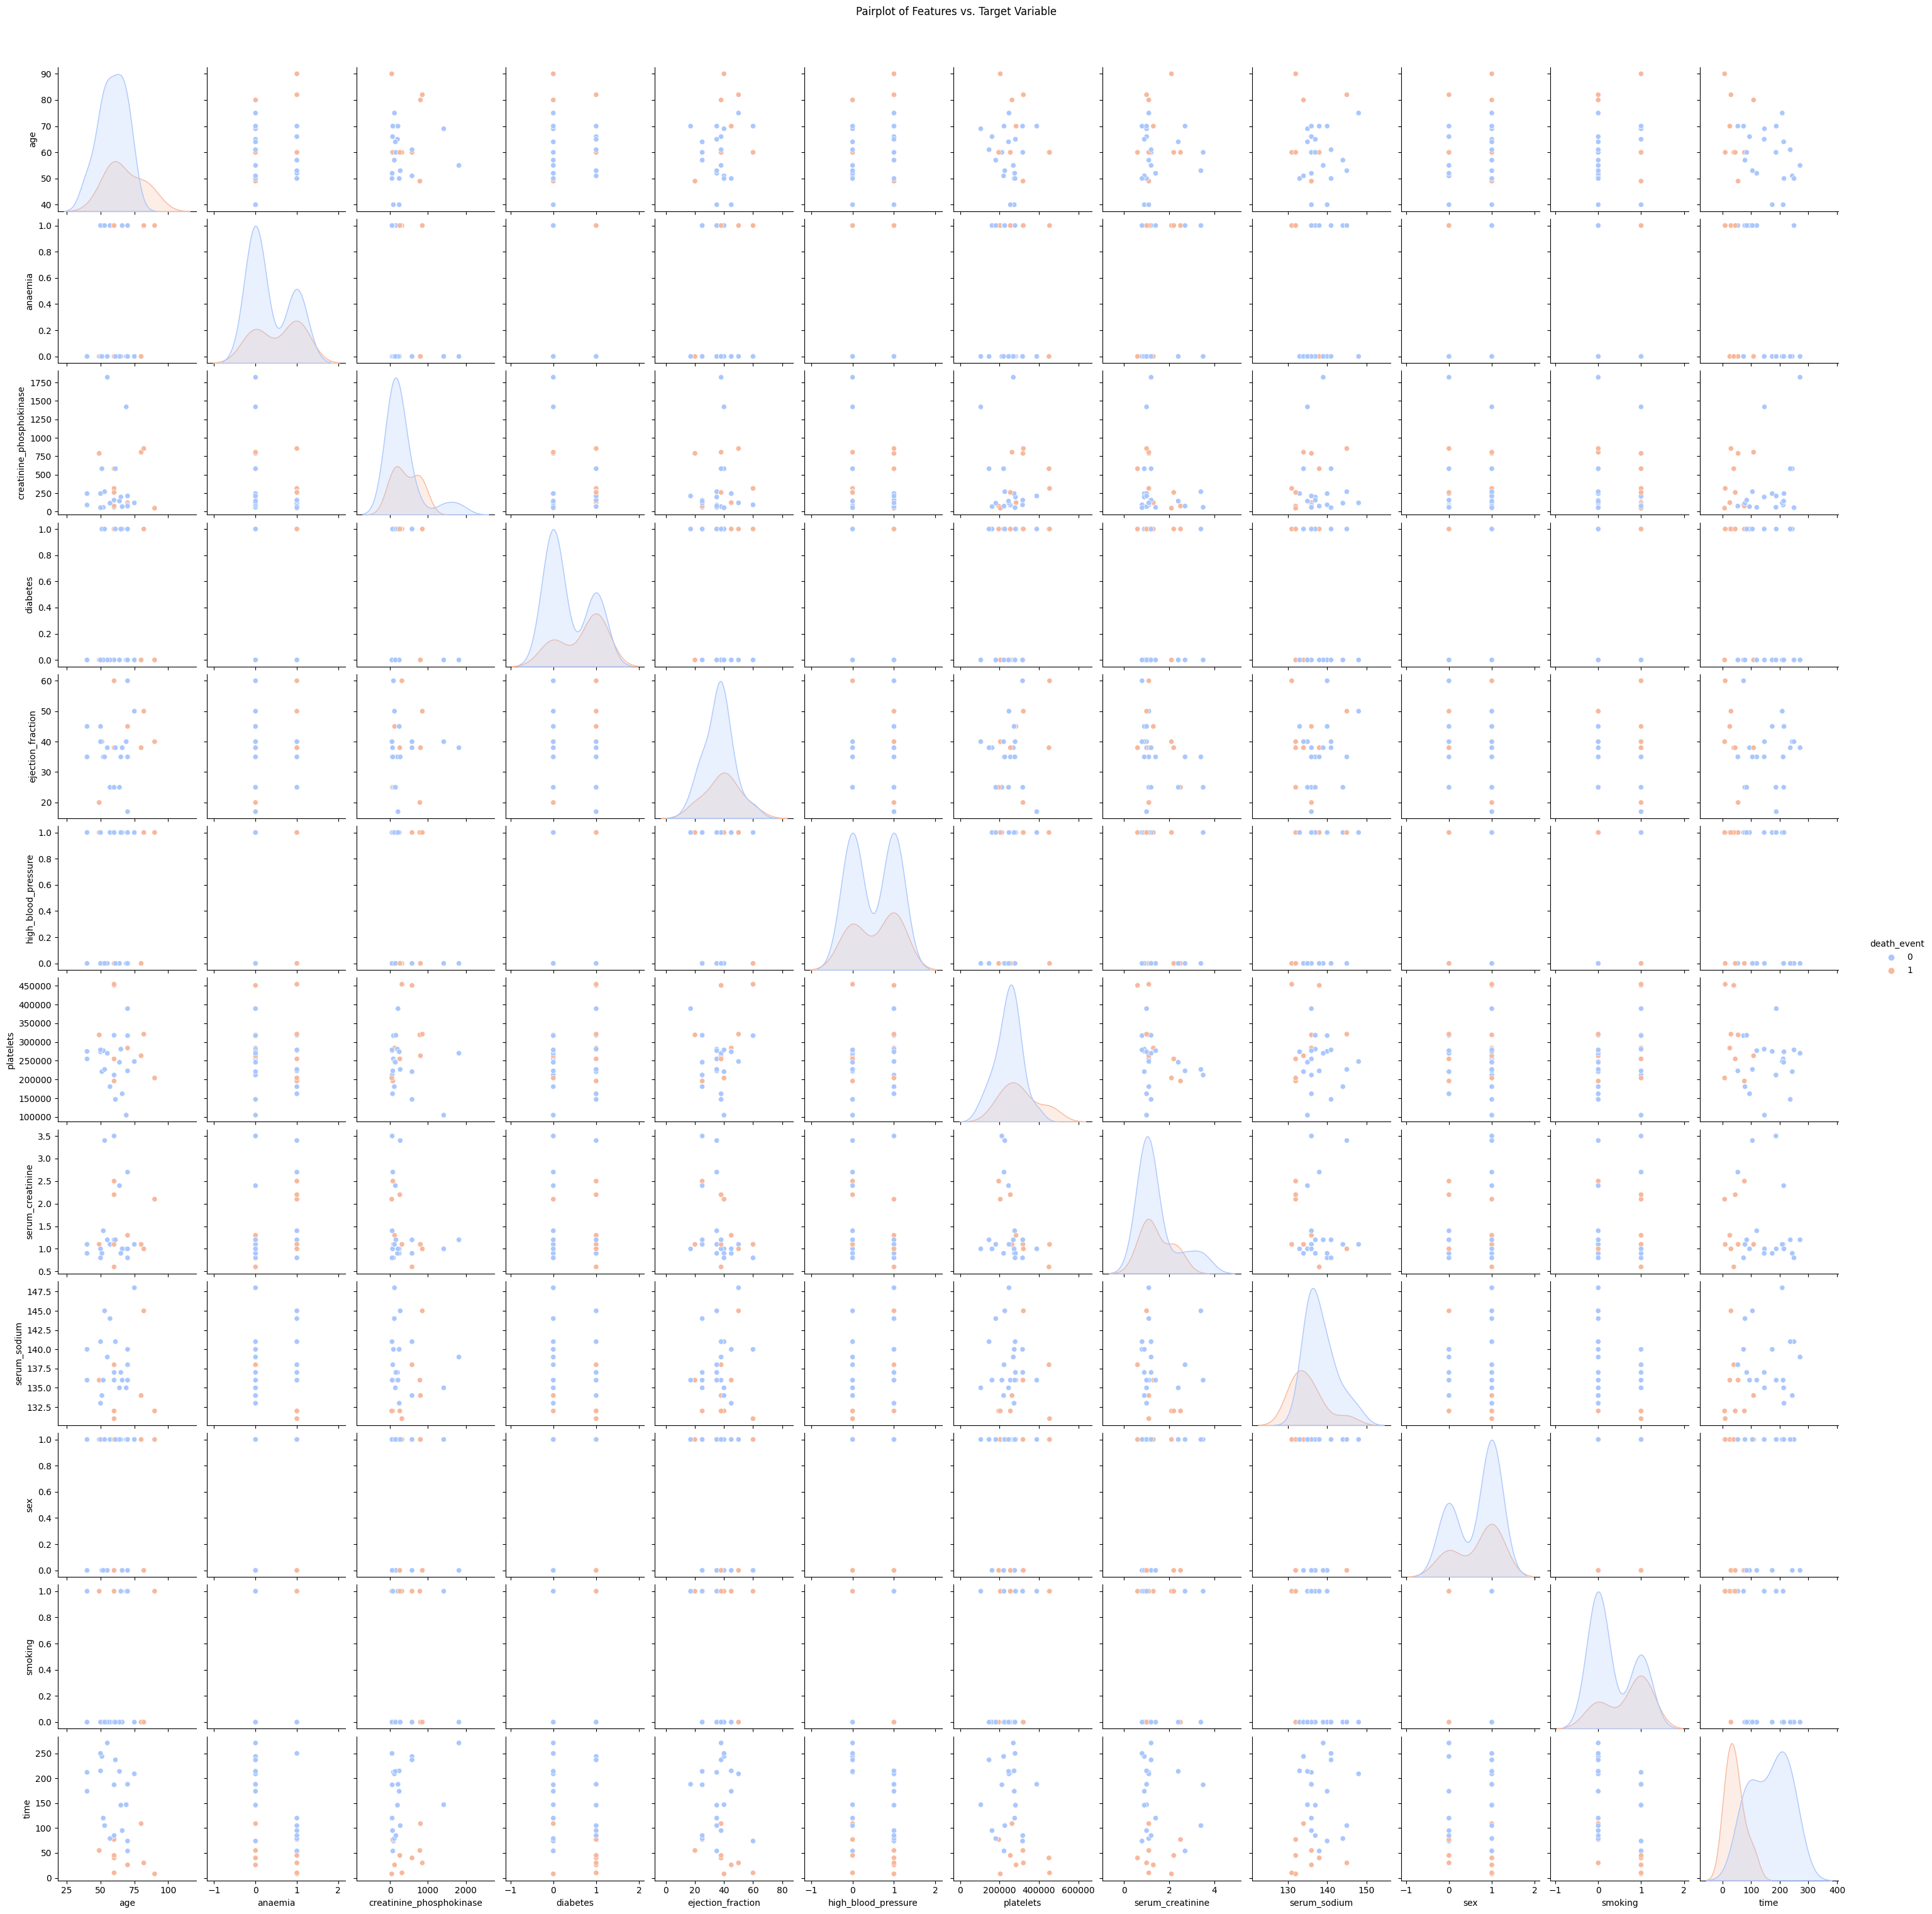

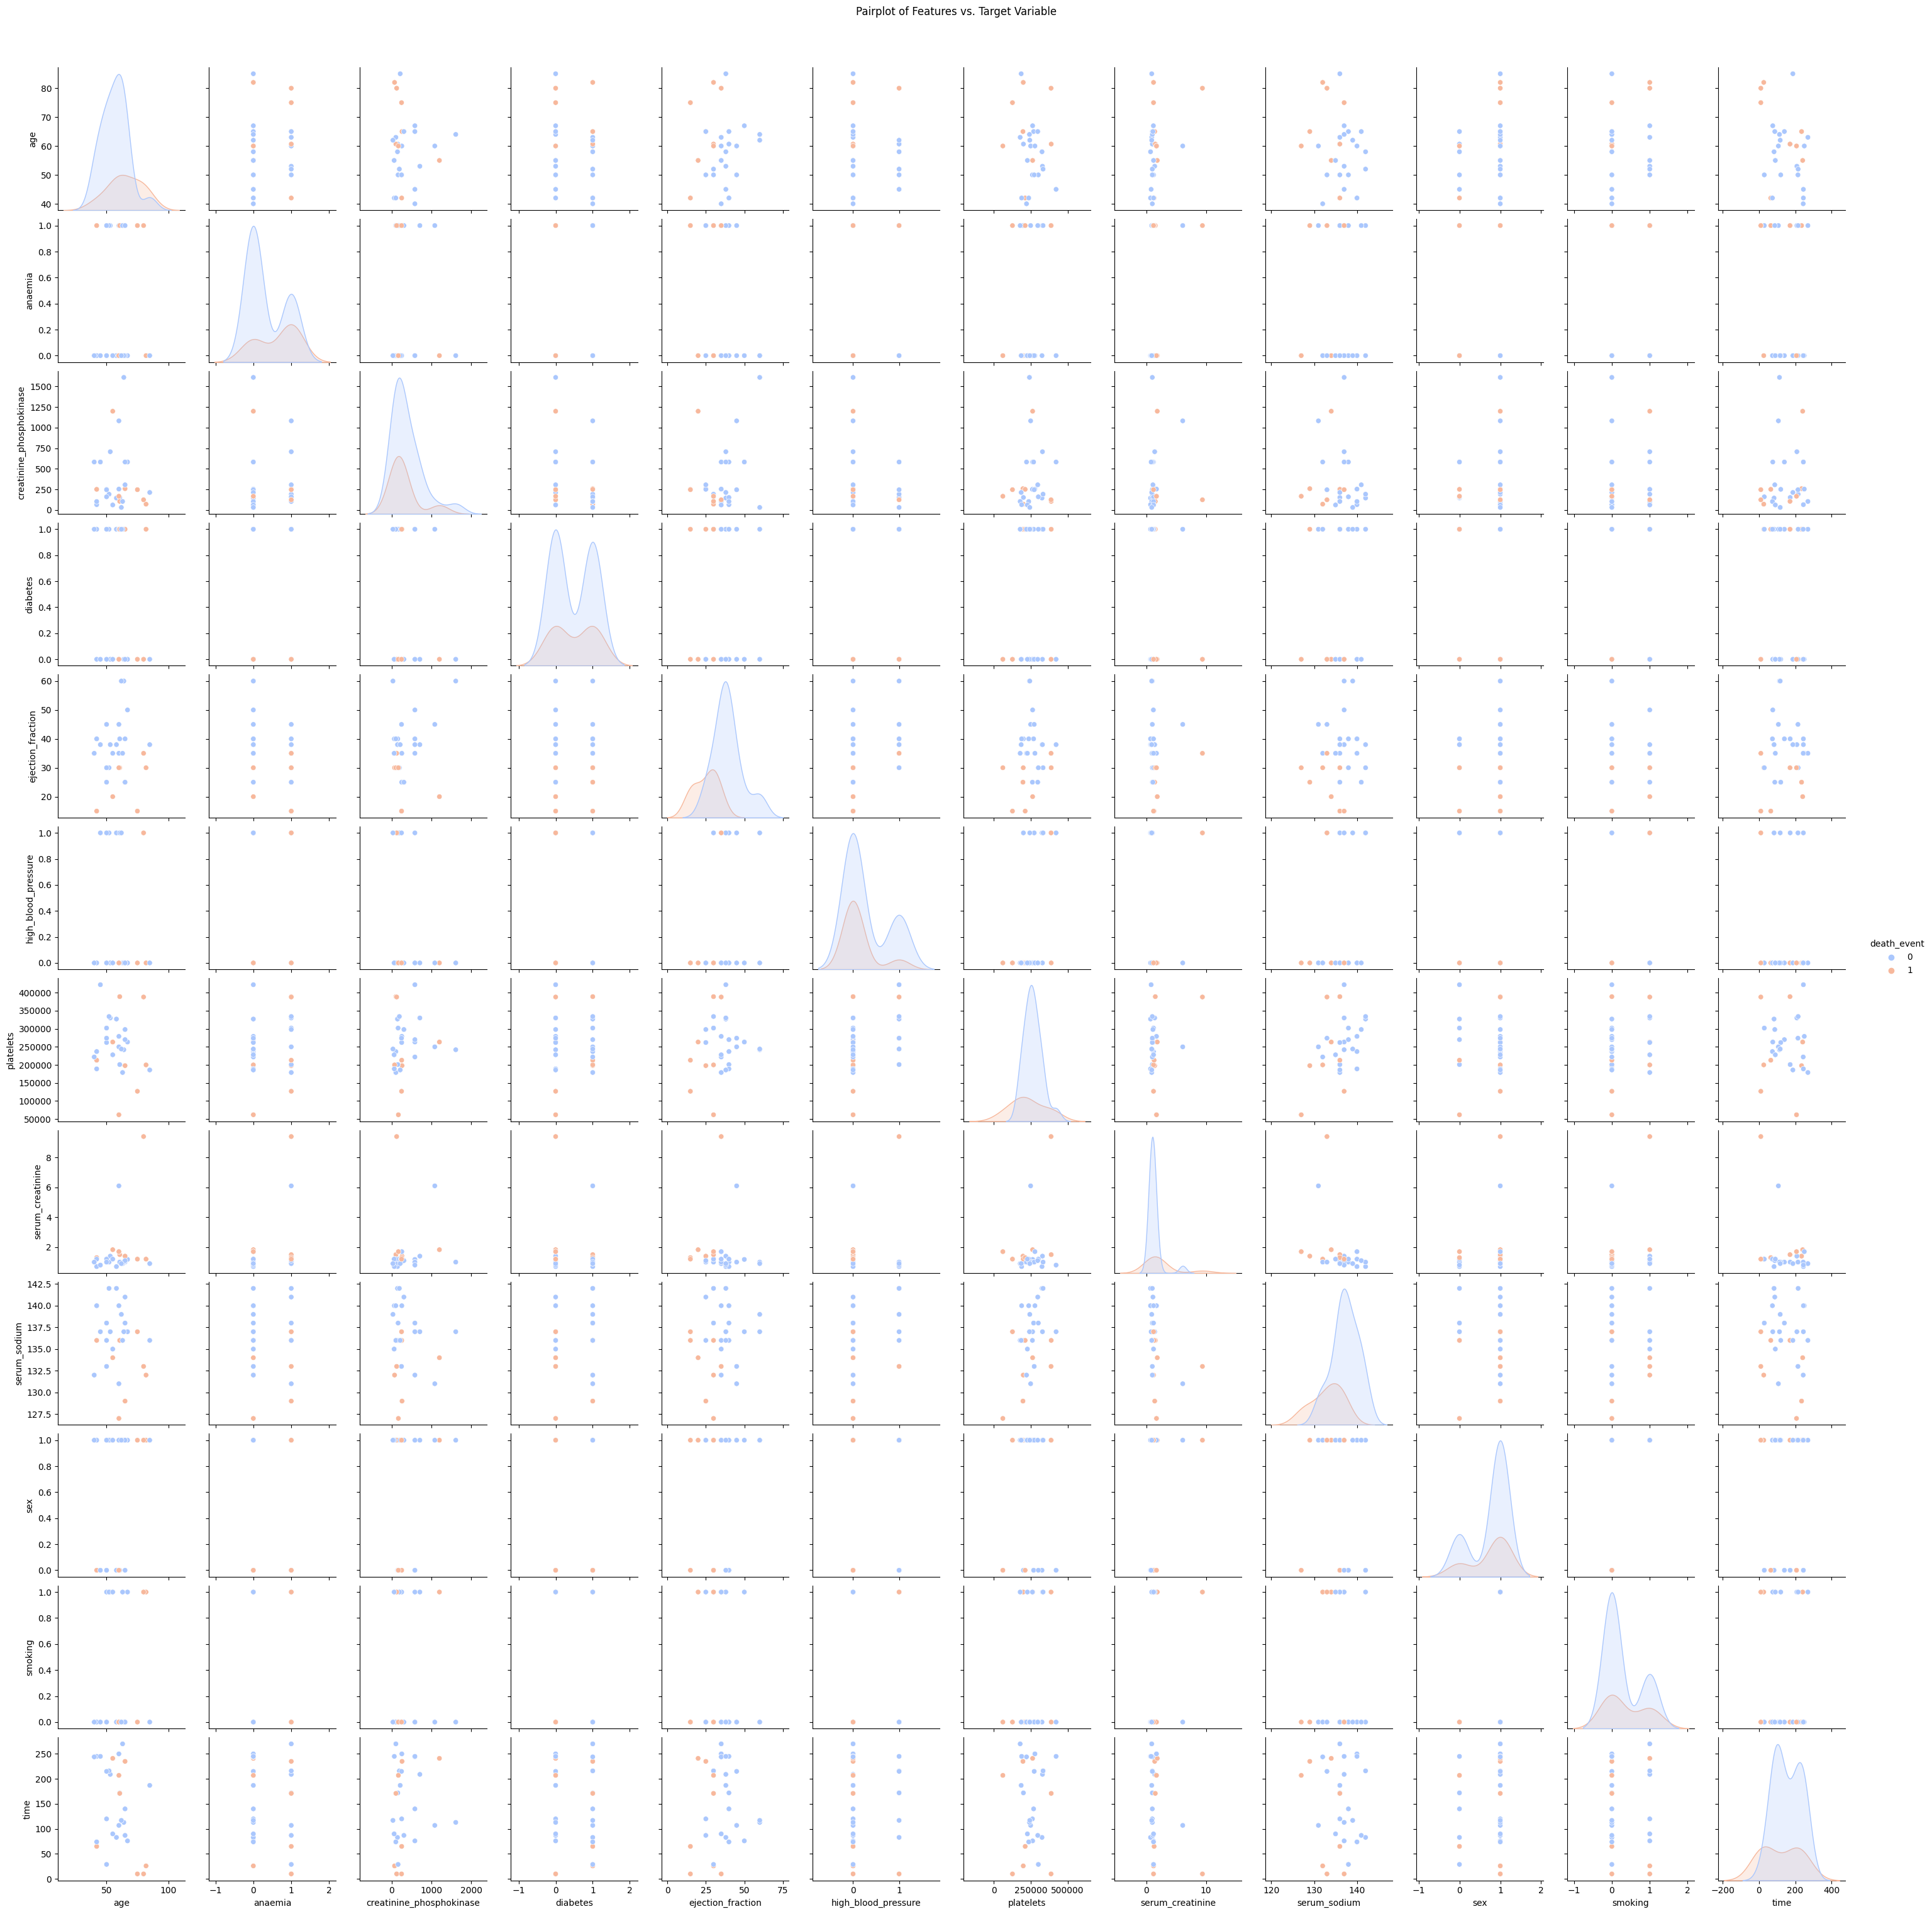

In [7]:
# Define a function to create pairplots for each subsample
def create_pairplot(subsample, target):
    sns.pairplot(subsample, hue=target, palette='coolwarm')
    plt.suptitle('Pairplot of Features vs. Target Variable', y=1.02)
    plt.show()

# Create pairplots for each subsample
for i in range(num_subsamples):
    subsample_indices = np.random.choice(df.index, size=subsample_size, replace=False)
    subsample = df.loc[subsample_indices]
    create_pairplot(subsample, target='death_event')

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<Figure size 1200x1000 with 0 Axes>

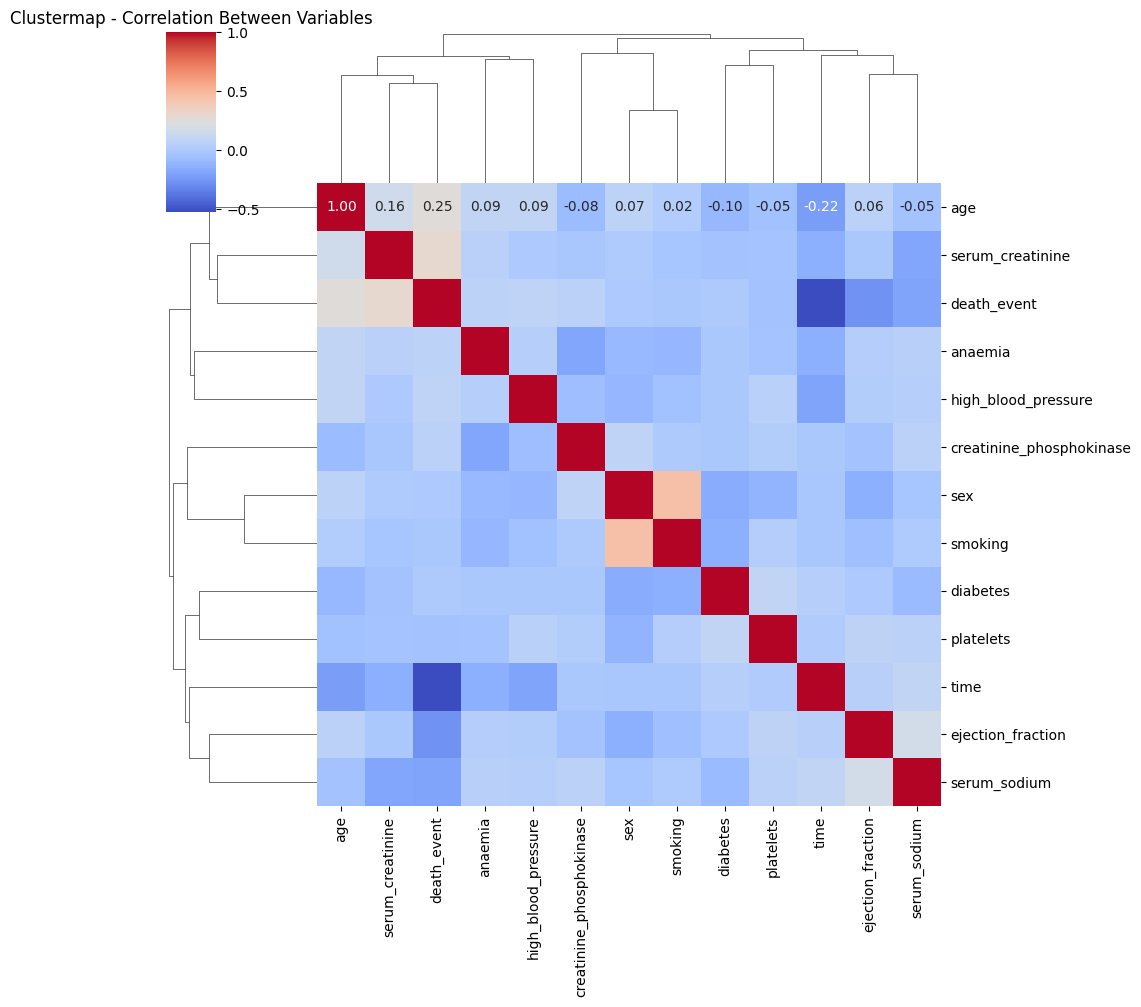

In [8]:
# Create a clustermap to explore relationships between variables
plt.figure(figsize=(12, 10))
sns.clustermap(df_numeric.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Clustermap - Correlation Between Variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [16]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Perform SVM modeling
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [17]:

# Evaluate performance
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        35
           1       1.00      0.04      0.08        25

    accuracy                           0.60        60
   macro avg       0.80      0.52      0.41        60
weighted avg       0.76      0.60      0.47        60

Confusion Matrix:
[[35  0]
 [24  1]]
